In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("Hackathon_Working_Data.csv")
df

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26980,M3,N10,31,T5999,10.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,NON-SALT CRACKER,NON-SALT CRACKER,PARLE PRODS,PARLE KRACK JACK,PARLE KRACK JACK
26981,M3,N10,31,T6007,88.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,MARIE,MARIE,PARLE PRODS,PARLE MARIE,PARLE MARIE
26982,M3,N10,31,T6007,88.0,2.0,20.0,10.0,BISCUITS - CORE & NON CORE,GLUCOSE,GLUCOSE,PARLE PRODS,PARLE-G,PARLE-G
26983,M3,N10,31,T6007,88.0,1.0,58.0,58.0,CLEANERS - GLASS,LIQUIDS,LIQUIDS,RECKITT BENCKISER,COLIN,COLIN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26985 entries, 0 to 26984
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      26985 non-null  object 
 1   STORECODE  26985 non-null  object 
 2   DAY        26985 non-null  int64  
 3   BILL_ID    26985 non-null  object 
 4   BILL_AMT   26985 non-null  float64
 5   QTY        26985 non-null  float64
 6   VALUE      26985 non-null  float64
 7   PRICE      26985 non-null  float64
 8   GRP        26985 non-null  object 
 9   SGRP       26985 non-null  object 
 10  SSGRP      26985 non-null  object 
 11  CMP        26985 non-null  object 
 12  MBRD       26985 non-null  object 
 13  BRD        26985 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.0+ MB


## Sales by Store Analysis

In [4]:
df['UNIQUE_ID'] = df['STORECODE'].str.cat(df['BILL_ID'],sep="_")
df

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD,UNIQUE_ID
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL,N1_T375
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY,N1_T379
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS,N1_T381
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT,N1_T382
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT,N1_T384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26980,M3,N10,31,T5999,10.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,NON-SALT CRACKER,NON-SALT CRACKER,PARLE PRODS,PARLE KRACK JACK,PARLE KRACK JACK,N10_T5999
26981,M3,N10,31,T6007,88.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,MARIE,MARIE,PARLE PRODS,PARLE MARIE,PARLE MARIE,N10_T6007
26982,M3,N10,31,T6007,88.0,2.0,20.0,10.0,BISCUITS - CORE & NON CORE,GLUCOSE,GLUCOSE,PARLE PRODS,PARLE-G,PARLE-G,N10_T6007
26983,M3,N10,31,T6007,88.0,1.0,58.0,58.0,CLEANERS - GLASS,LIQUIDS,LIQUIDS,RECKITT BENCKISER,COLIN,COLIN,N10_T6007


In [5]:
by_store = df.groupby("UNIQUE_ID").mean()[["DAY","BILL_AMT","QTY"]]
by_store

,DAY,BILL_AMT,QTY
UNIQUE_ID,,,
N10_T1038,5,34.0,1.000000
N10_T1039,5,46.0,1.000000
N10_T1040,5,86.0,1.000000
N10_T1043,5,20.0,1.000000
N10_T1048,5,180.0,1.000000
...,...,...,...
N9_T940,2,200.0,1.000000
N9_T95,7,56.0,1.000000
N9_T953,3,1656.0,2.545455


In [6]:
merged_df = pd.merge(df,by_store,on="UNIQUE_ID")
merged_df

,MONTH,STORECODE,DAY_x,BILL_ID,BILL_AMT_x,QTY_x,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD,UNIQUE_ID,DAY_y,BILL_AMT_y,QTY_y
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL,N1_T375,4,225.0,1.000000
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY,N1_T379,4,95.0,1.000000
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS,N1_T381,4,10.0,1.000000
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT,N1_T382,4,108.0,1.000000
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT,N1_T384,4,19.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26980,M3,N10,31,T5999,10.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,NON-SALT CRACKER,NON-SALT CRACKER,PARLE PRODS,PARLE KRACK JACK,PARLE KRACK JACK,N10_T5999,31,10.0,1.000000
26981,M3,N10,31,T6007,88.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,MARIE,MARIE,PARLE PRODS,PARLE MARIE,PARLE MARIE,N10_T6007,31,88.0,1.333333
26982,M3,N10,31,T6007,88.0,2.0,20.0,10.0,BISCUITS - CORE & NON CORE,GLUCOSE,GLUCOSE,PARLE PRODS,PARLE-G,PARLE-G,N10_T6007,31,88.0,1.333333
26983,M3,N10,31,T6007,88.0,1.0,58.0,58.0,CLEANERS - GLASS,LIQUIDS,LIQUIDS,RECKITT BENCKISER,COLIN,COLIN,N10_T6007,31,88.0,1.333333


In [7]:
merged_df = merged_df.drop(["DAY_x","BILL_AMT_x"], axis=1)
merged_df

,MONTH,STORECODE,BILL_ID,QTY_x,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD,UNIQUE_ID,DAY_y,BILL_AMT_y,QTY_y
0,M1,N1,T375,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL,N1_T375,4,225.0,1.000000
1,M1,N1,T379,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY,N1_T379,4,95.0,1.000000
2,M1,N1,T381,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS,N1_T381,4,10.0,1.000000
3,M1,N1,T382,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT,N1_T382,4,108.0,1.000000
4,M1,N1,T384,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT,N1_T384,4,19.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26980,M3,N10,T5999,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,NON-SALT CRACKER,NON-SALT CRACKER,PARLE PRODS,PARLE KRACK JACK,PARLE KRACK JACK,N10_T5999,31,10.0,1.000000
26981,M3,N10,T6007,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,MARIE,MARIE,PARLE PRODS,PARLE MARIE,PARLE MARIE,N10_T6007,31,88.0,1.333333
26982,M3,N10,T6007,2.0,20.0,10.0,BISCUITS - CORE & NON CORE,GLUCOSE,GLUCOSE,PARLE PRODS,PARLE-G,PARLE-G,N10_T6007,31,88.0,1.333333
26983,M3,N10,T6007,1.0,58.0,58.0,CLEANERS - GLASS,LIQUIDS,LIQUIDS,RECKITT BENCKISER,COLIN,COLIN,N10_T6007,31,88.0,1.333333


In [8]:
unique_sales = merged_df.groupby("UNIQUE_ID",as_index=True).mean()[["DAY_y","BILL_AMT_y"]]
unique_sales

,DAY_y,BILL_AMT_y
UNIQUE_ID,,
N10_T1038,5,34.0
N10_T1039,5,46.0
N10_T1040,5,86.0
N10_T1043,5,20.0
N10_T1048,5,180.0
...,...,...
N9_T940,2,200.0
N9_T95,7,56.0
N9_T953,3,1656.0


In [9]:
unique_sales['STORE'] = unique_sales.index.str.split('_').str[0]
unique_sales

,DAY_y,BILL_AMT_y,STORE
UNIQUE_ID,,,
N10_T1038,5,34.0,N10
N10_T1039,5,46.0,N10
N10_T1040,5,86.0,N10
N10_T1043,5,20.0,N10
N10_T1048,5,180.0,N10
...,...,...,...
N9_T940,2,200.0,N9
N9_T95,7,56.0,N9
N9_T953,3,1656.0,N9


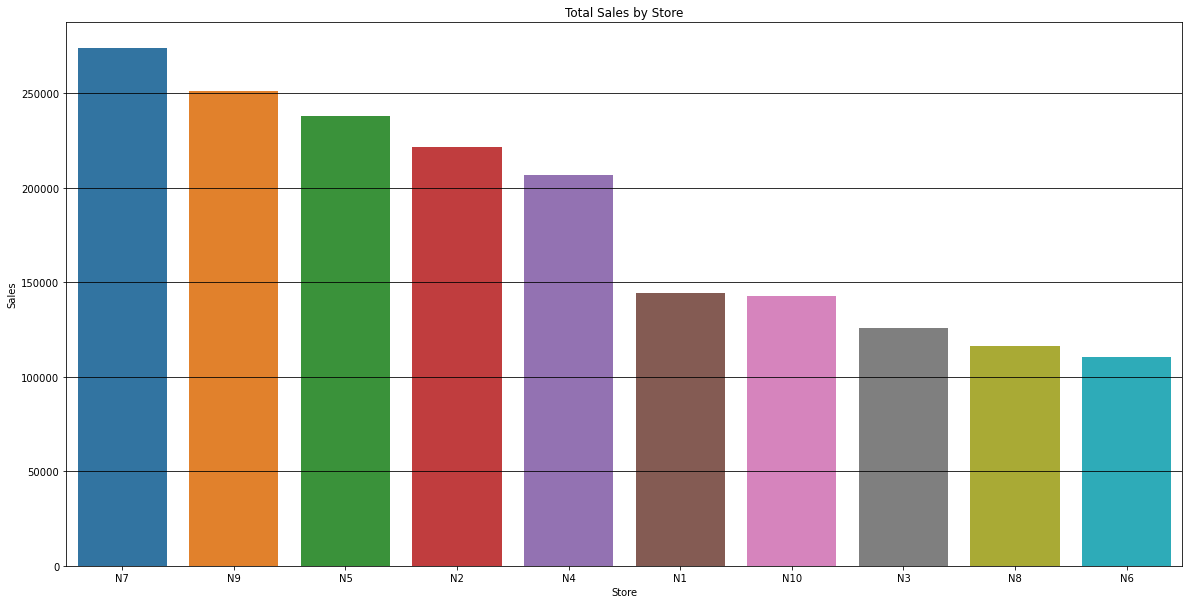

In [10]:
sales_by_store = unique_sales.groupby("STORE").sum().sort_values('BILL_AMT_y', ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(x=sales_by_store.index,y=sales_by_store['BILL_AMT_y'],data=sales_by_store)
plt.title("Total Sales by Store")
plt.xlabel("Store")
plt.ylabel("Sales")
plt.grid(axis='y',color='black')

## What are the daily sales by Store?

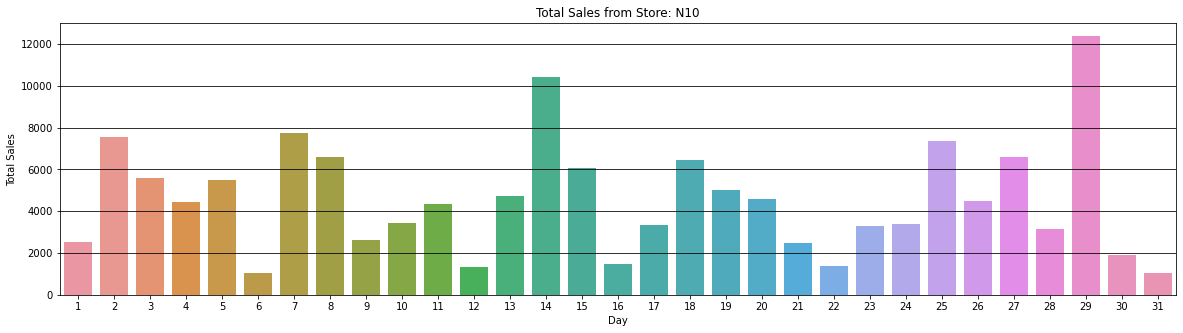

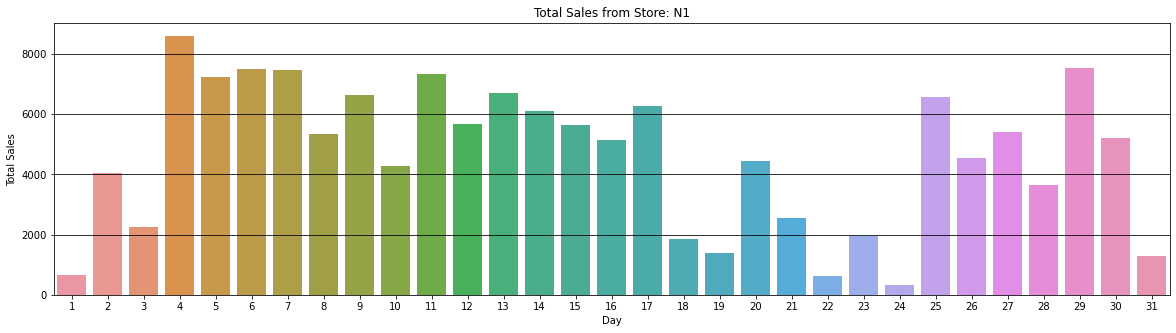

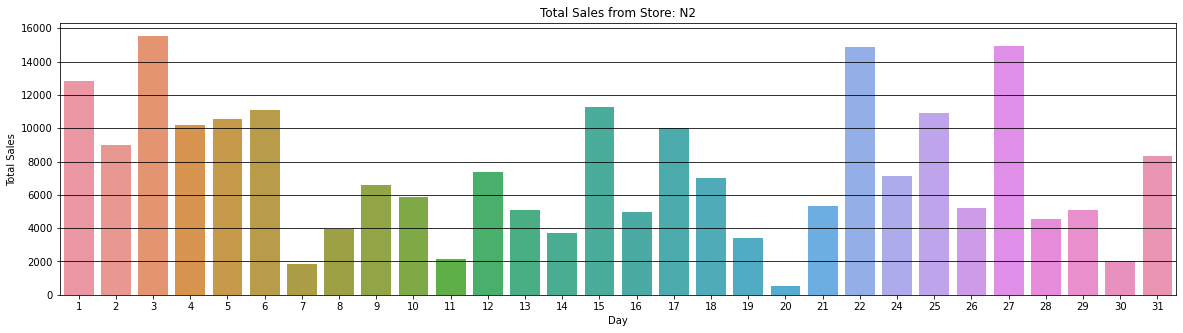

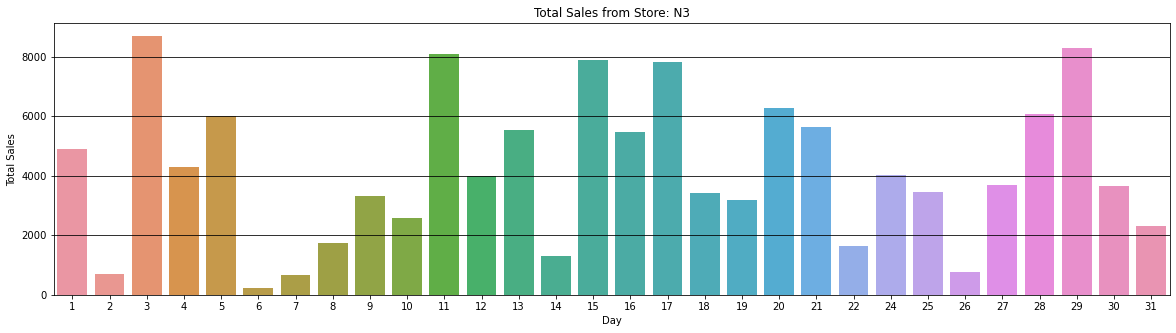

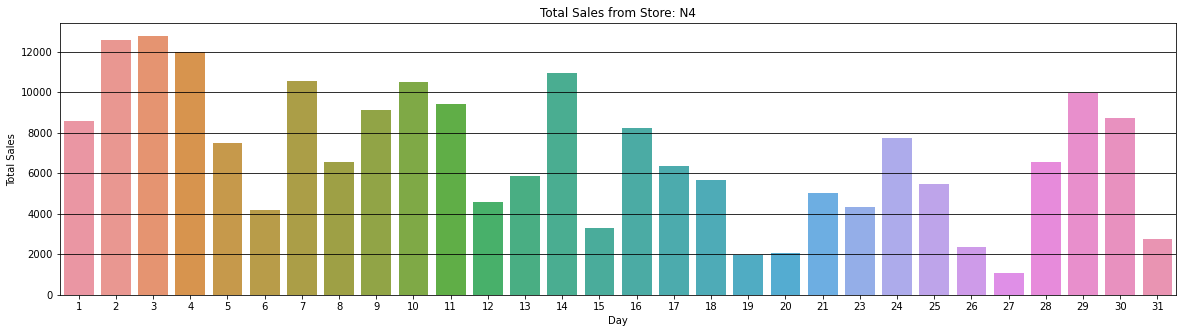

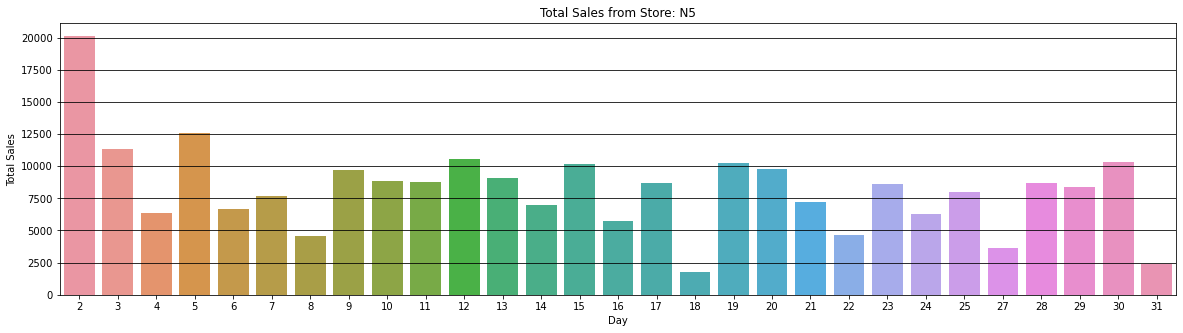

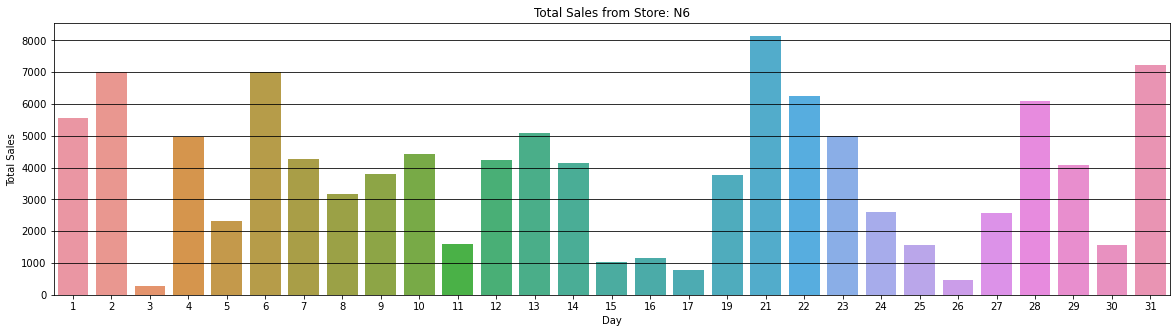

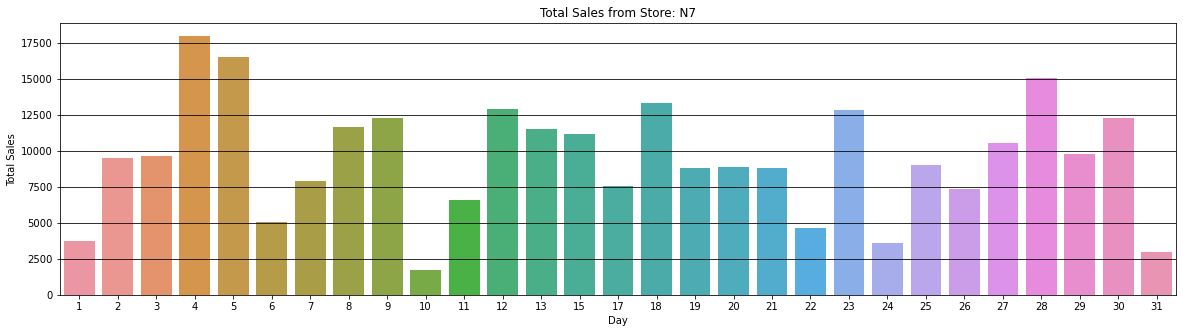

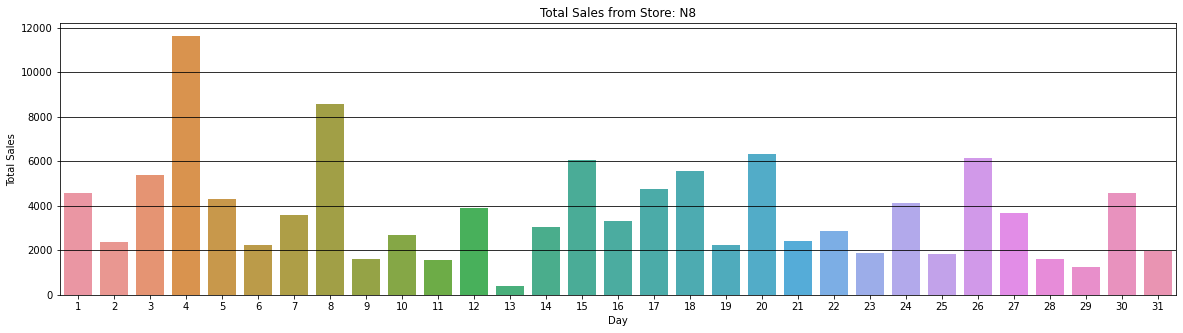

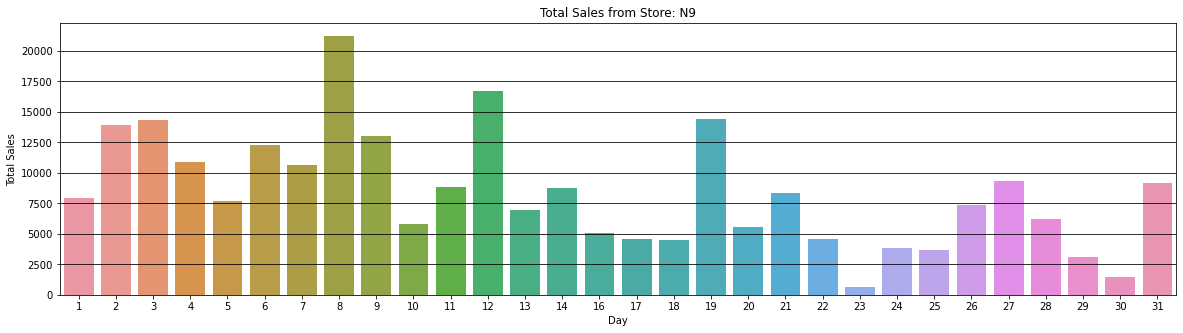

In [11]:
for i in unique_sales.STORE.unique():
    store = unique_sales.loc[unique_sales.STORE == i].groupby("DAY_y").sum()
    plt.figure(figsize=(20,5))
    sns.barplot(x=store.index,y=store["BILL_AMT_y"],data=store)
    plt.title("Total Sales from Store: " + i)
    plt.xlabel("Day")
    plt.ylabel("Total Sales")
    plt.grid(axis='y',color='black')

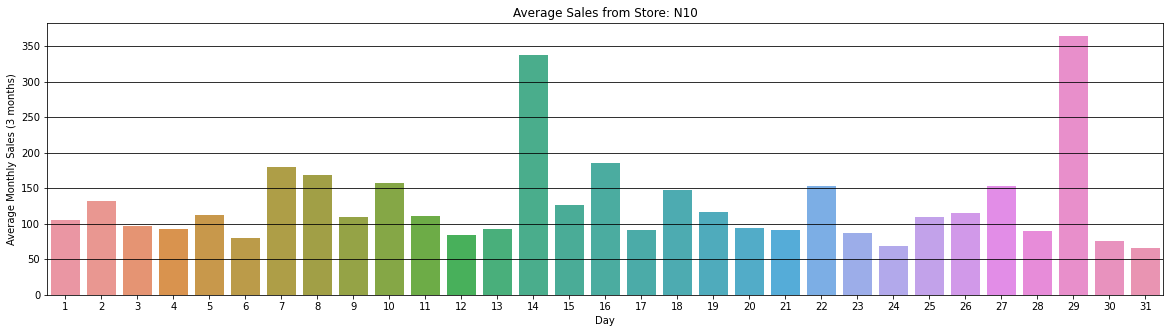

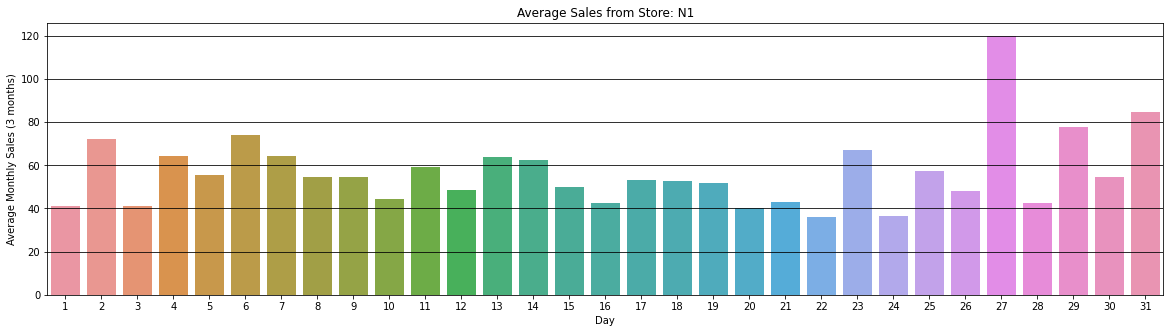

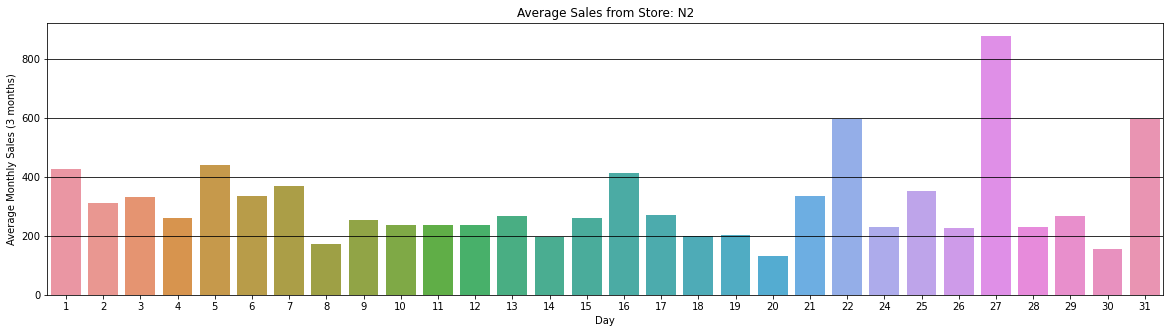

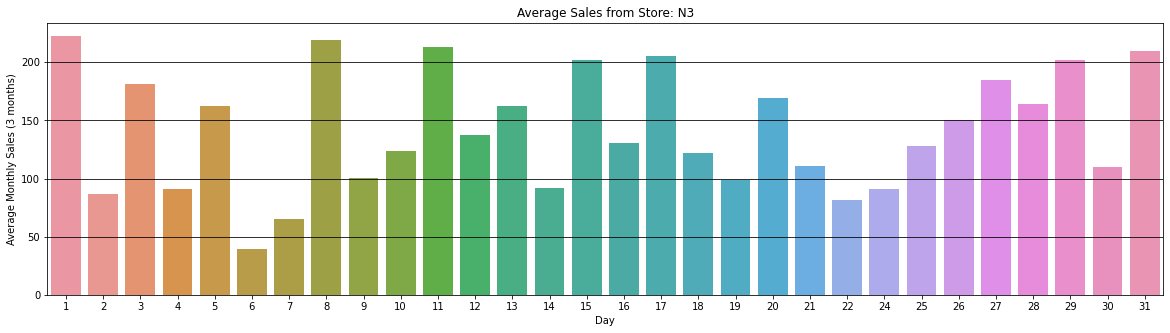

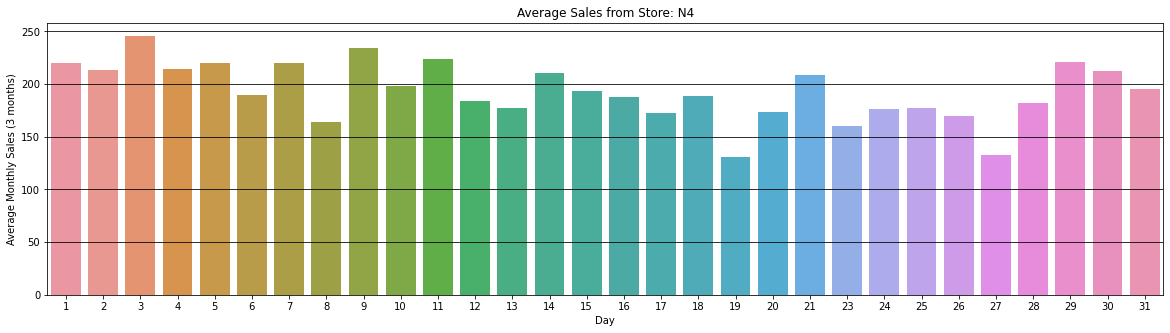

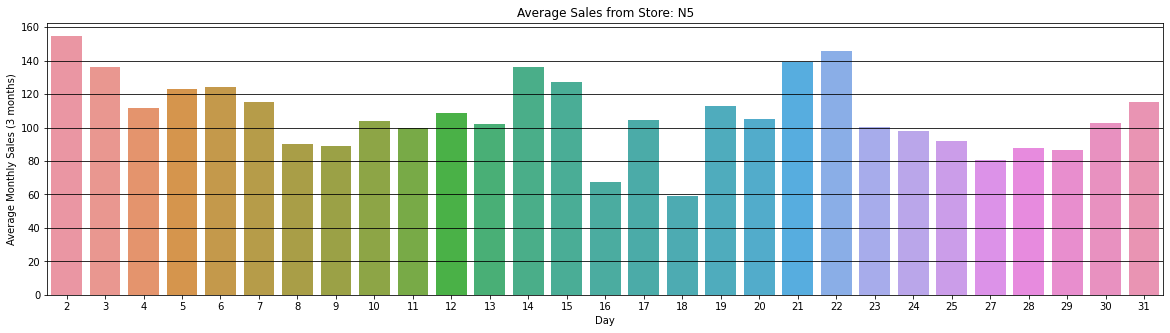

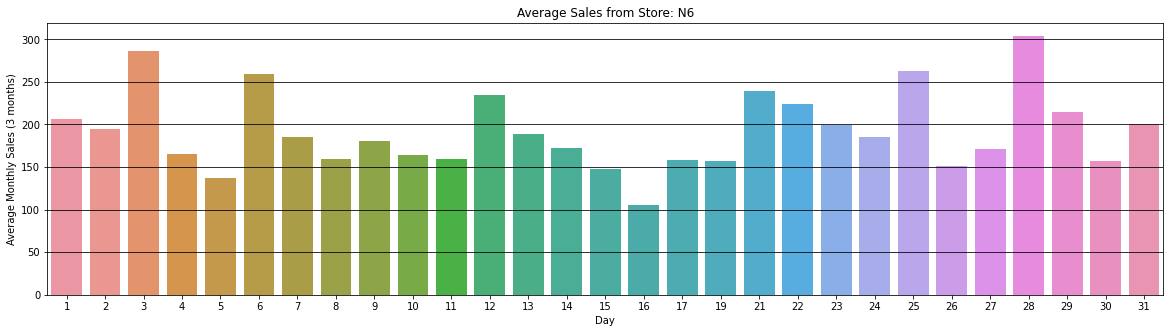

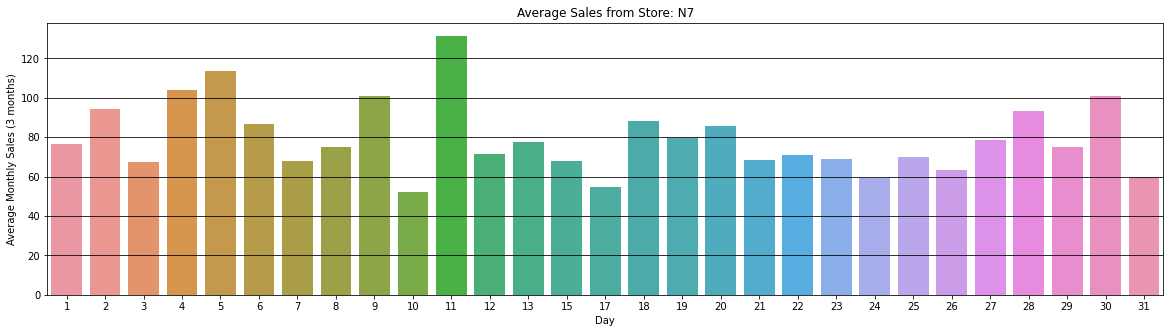

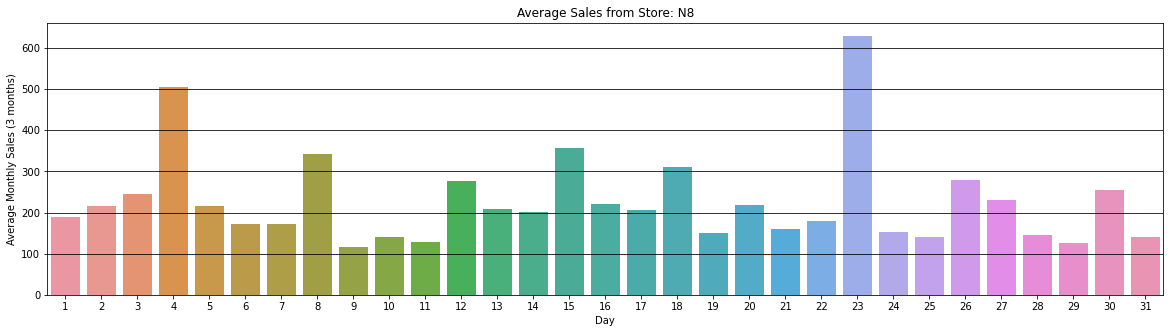

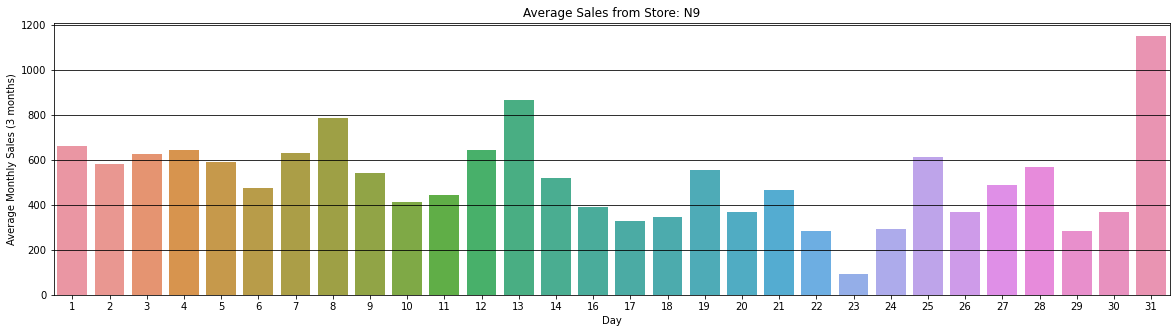

In [12]:
for i in unique_sales.STORE.unique():
    store = unique_sales.loc[unique_sales.STORE == i].groupby("DAY_y").mean()
    plt.figure(figsize=(20,5))
    sns.barplot(x=store.index,y=store["BILL_AMT_y"],data=store)
    plt.title("Average Sales from Store: " + i)
    plt.xlabel("Day")
    plt.ylabel("Average Monthly Sales (3 months)")
    plt.grid(axis='y',color='black')

## Which category sells the most items in general and by store? 

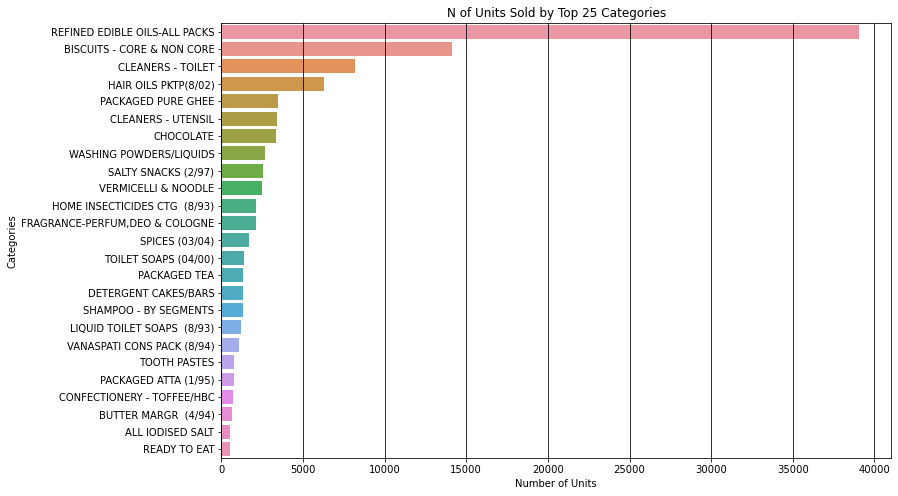

In [13]:
top_items = merged_df.groupby('GRP').sum().sort_values("QTY_x",ascending=False)[['QTY_x','PRICE']][0:25]
plt.figure(figsize=(12,8))
sns.barplot(x='QTY_x',y=top_items.index,data=top_items)
plt.title("N of Units Sold by Top 25 Categories")
plt.xlabel("Number of Units")
plt.ylabel("Categories")
plt.grid(axis='x',color='black');

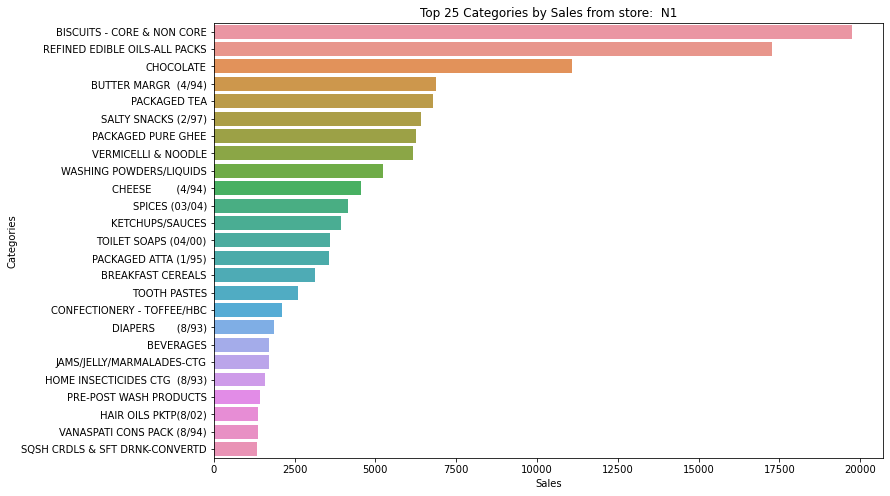

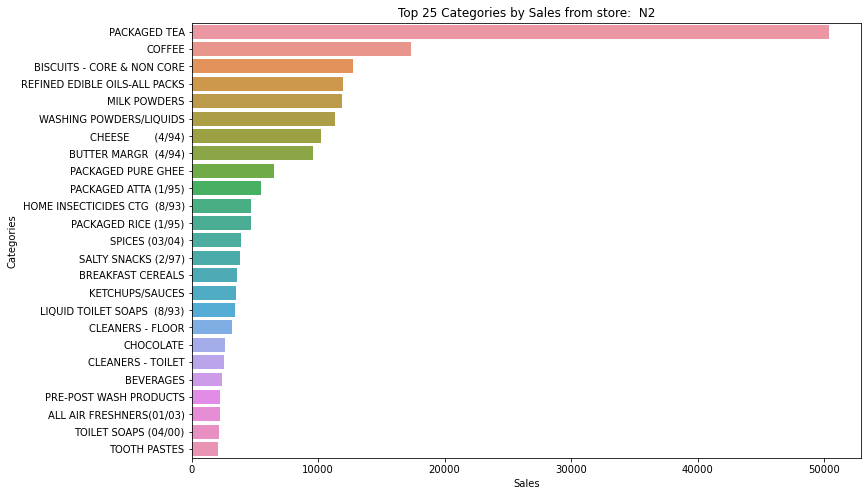

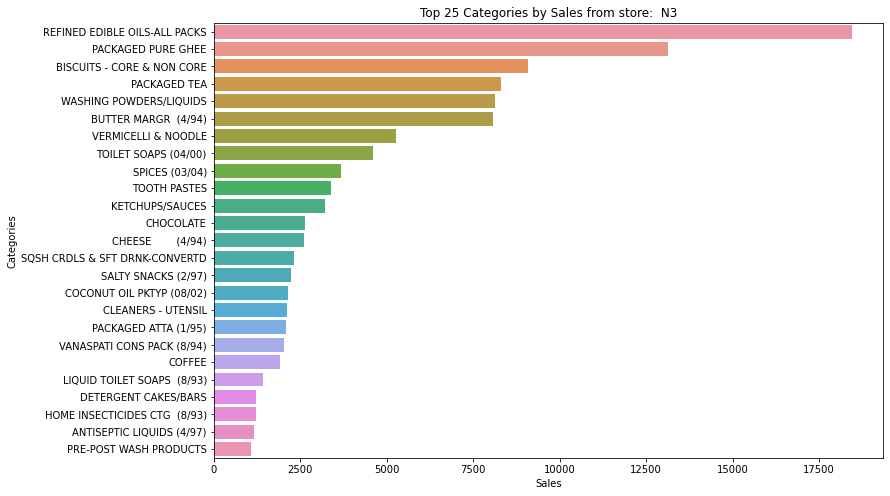

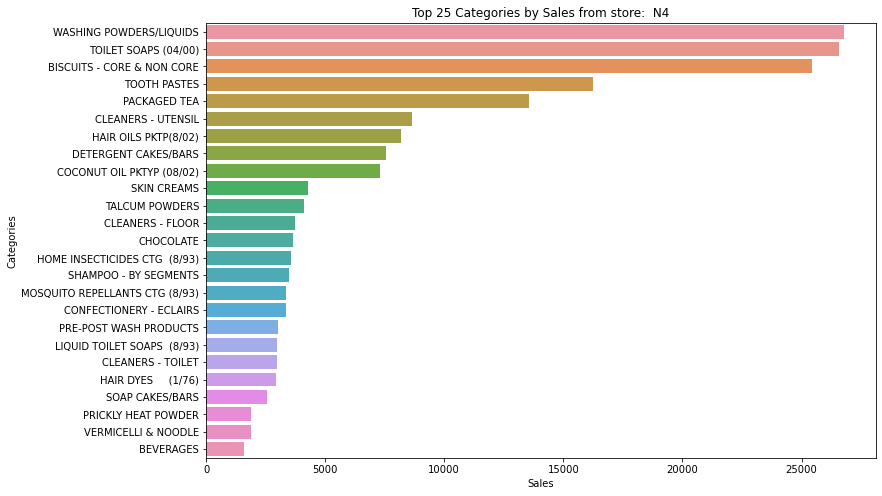

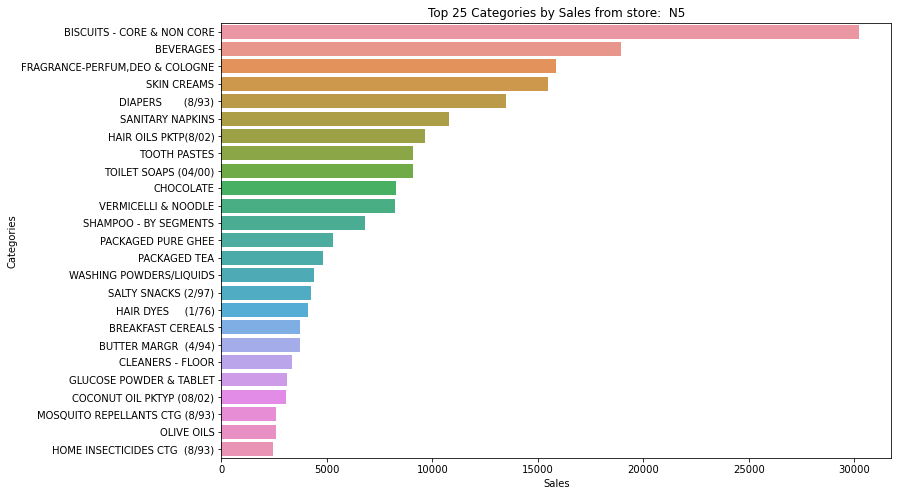

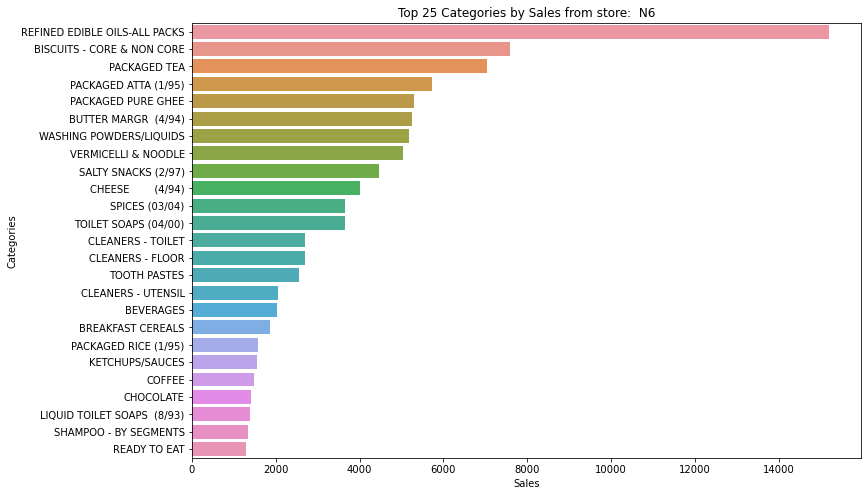

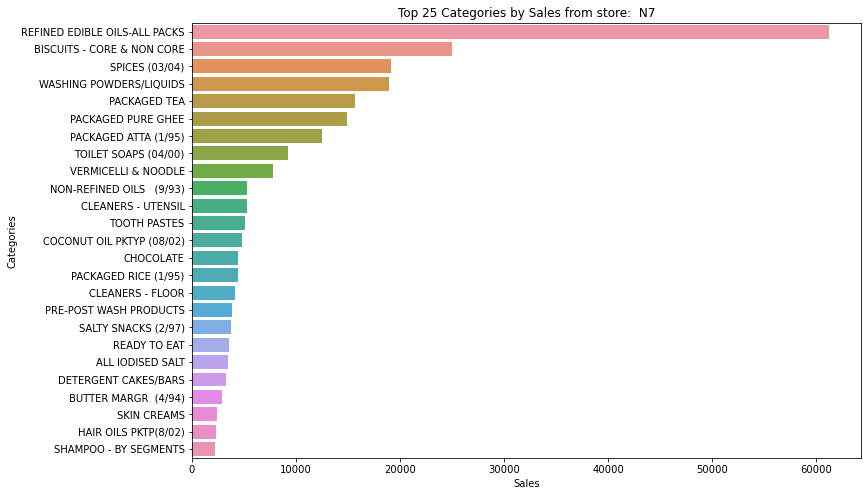

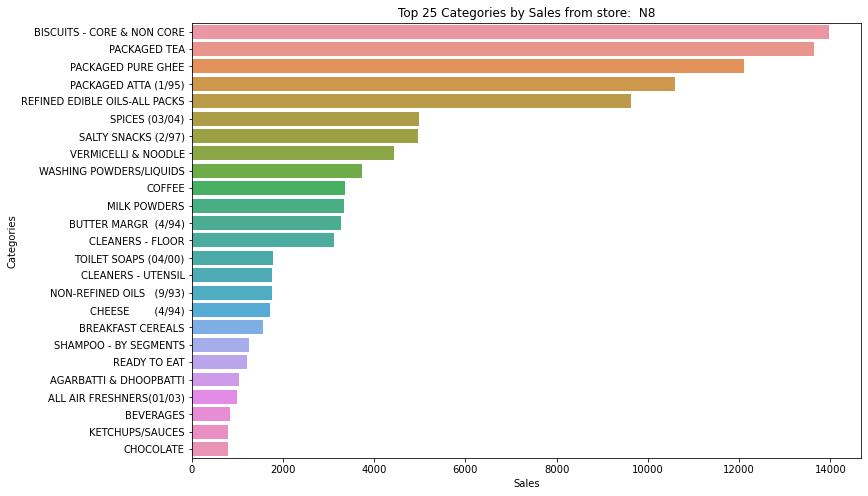

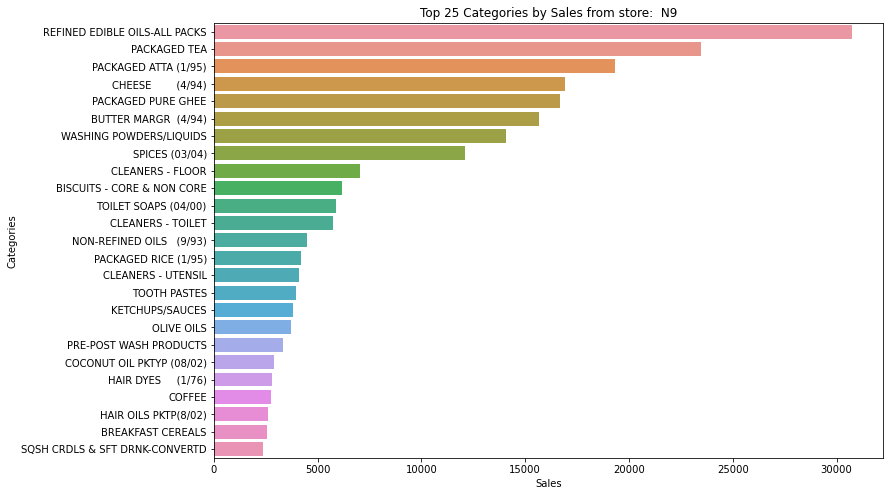

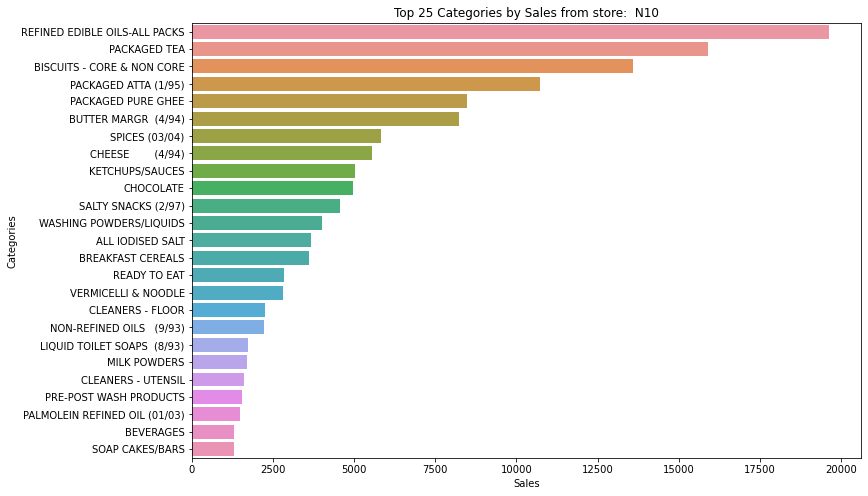

In [14]:
for i in merged_df.STORECODE.unique():
    x = merged_df.loc[df.STORECODE == i].groupby("GRP").sum().sort_values("VALUE",ascending=False)[["VALUE","QTY_x"]][0:25]
    plt.figure(figsize=(12,8))
    sns.barplot(x='VALUE',y=x.index,data=x)
    plt.title("Top 25 Categories by Sales from store:  " + i)
    plt.ylabel("Categories")
    plt.xlabel("Sales")

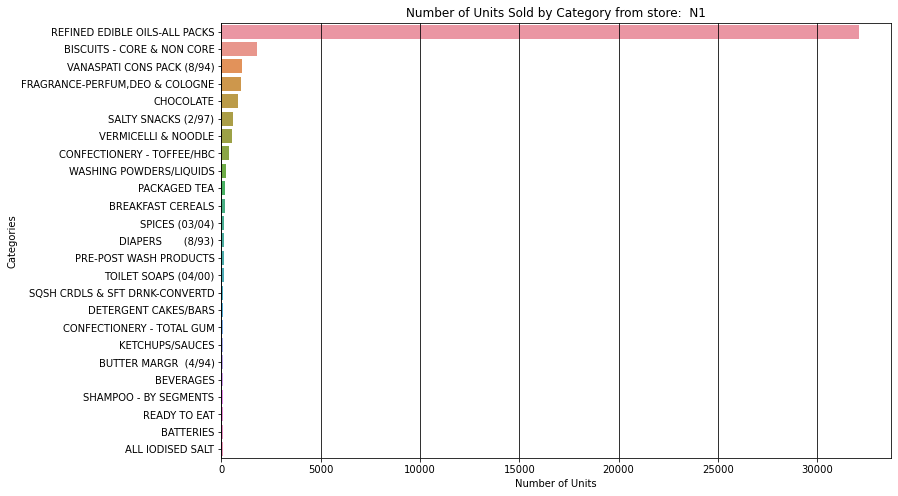

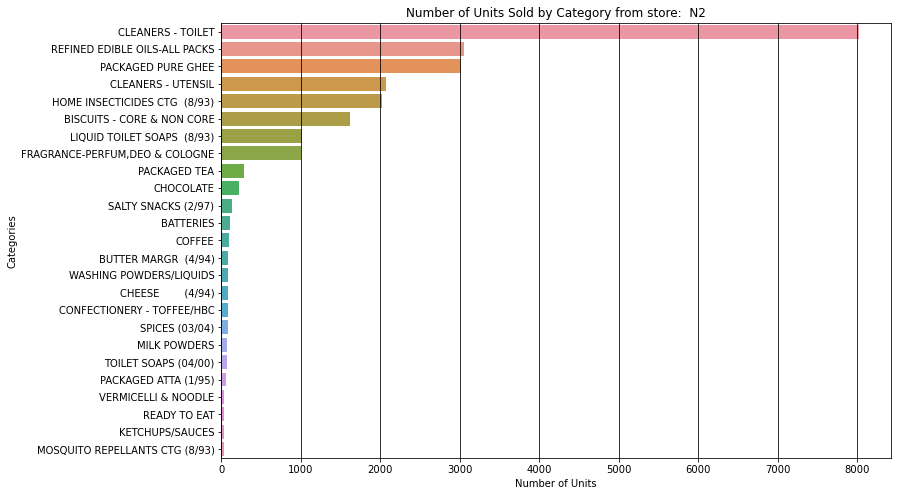

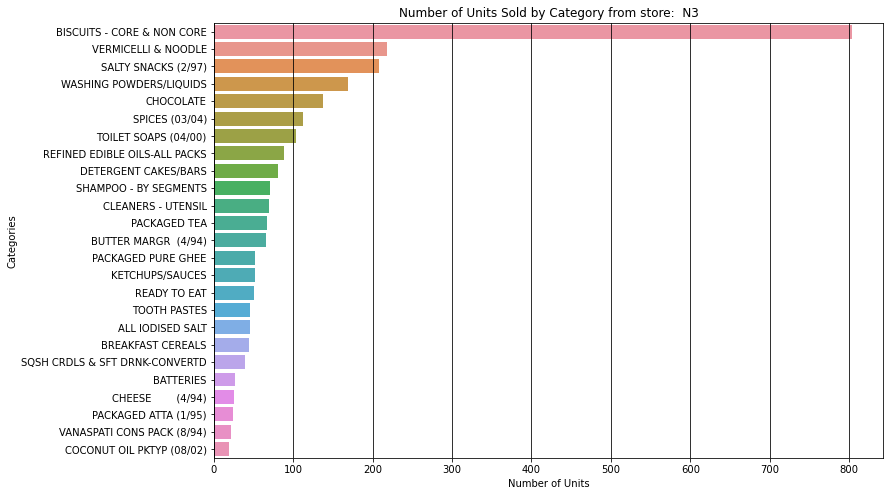

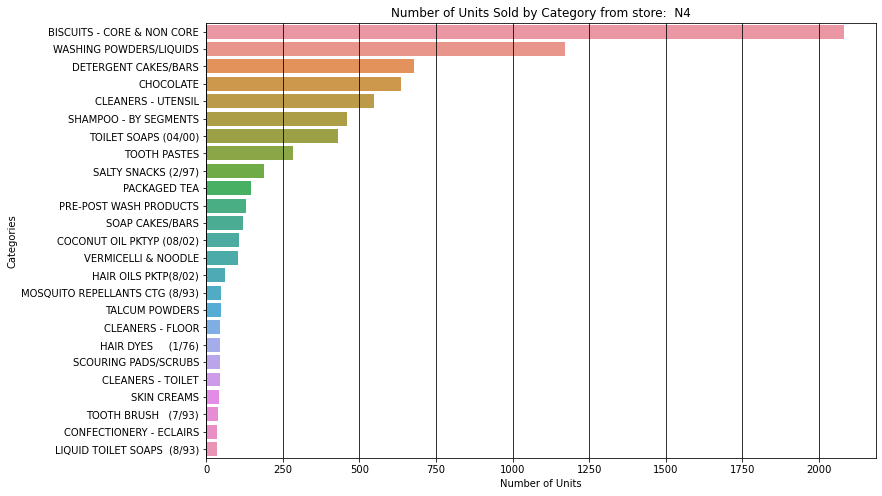

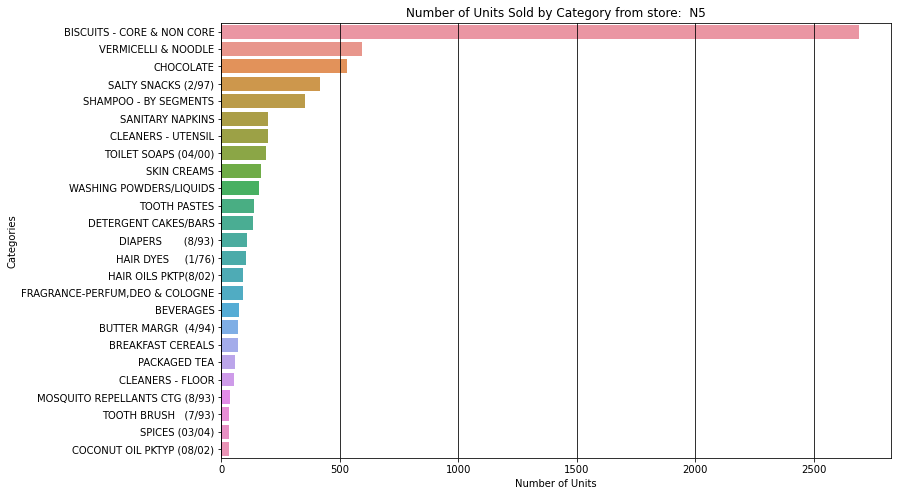

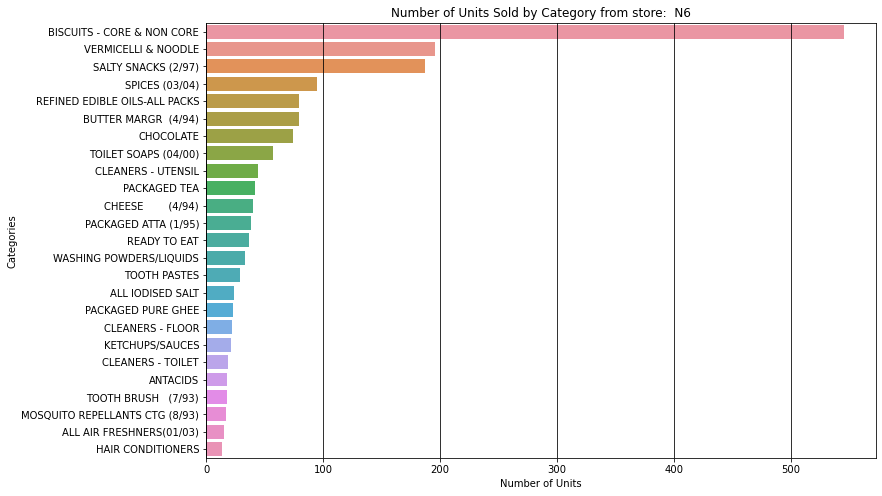

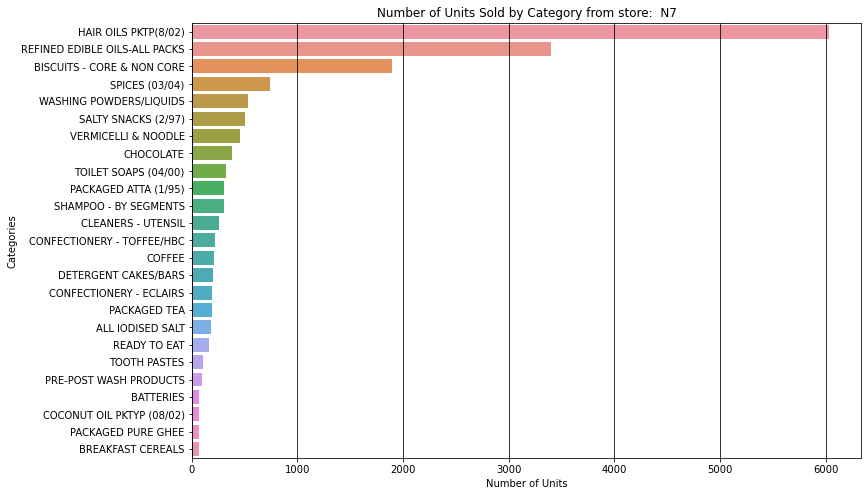

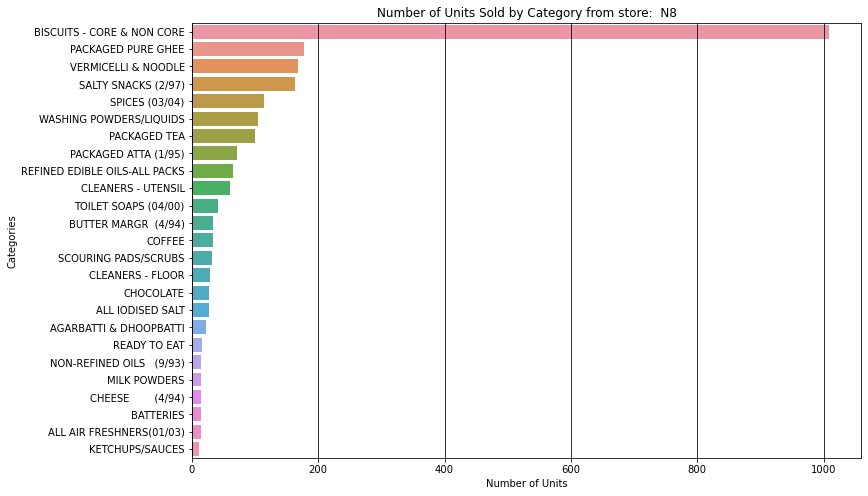

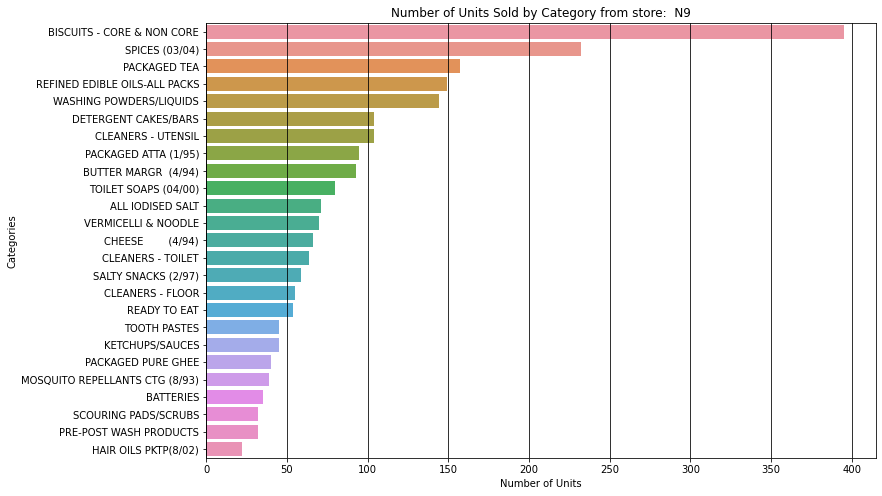

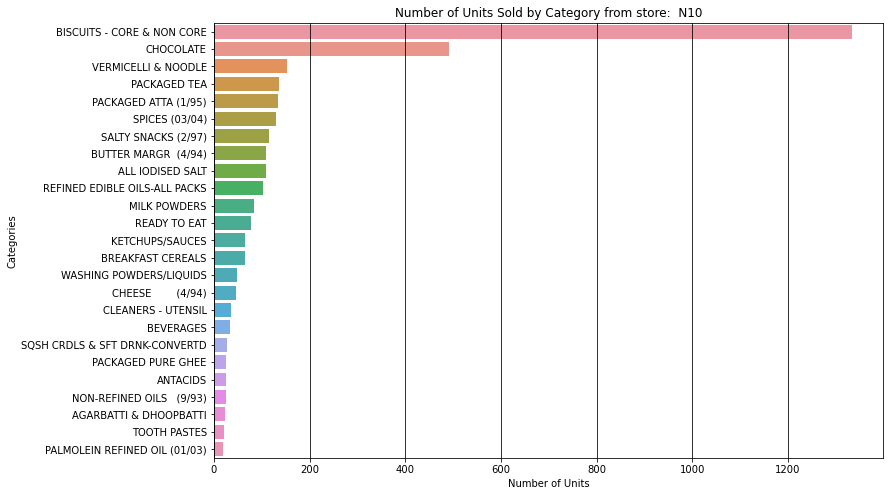

In [15]:
for i in merged_df.STORECODE.unique():
    x = merged_df.loc[df.STORECODE == i].groupby("GRP").sum().sort_values("QTY_x",ascending=False)[["VALUE","QTY_x"]][0:25]
    plt.figure(figsize=(12,8))
    sns.barplot(x='QTY_x',y=x.index,data=x)
    plt.title("Number of Units Sold by Category from store:  " + i)
    plt.xlabel("Number of Units")
    plt.ylabel("Categories")
    plt.grid(axis='x',color='black')

## Which Brands sell more by dollars and by units?

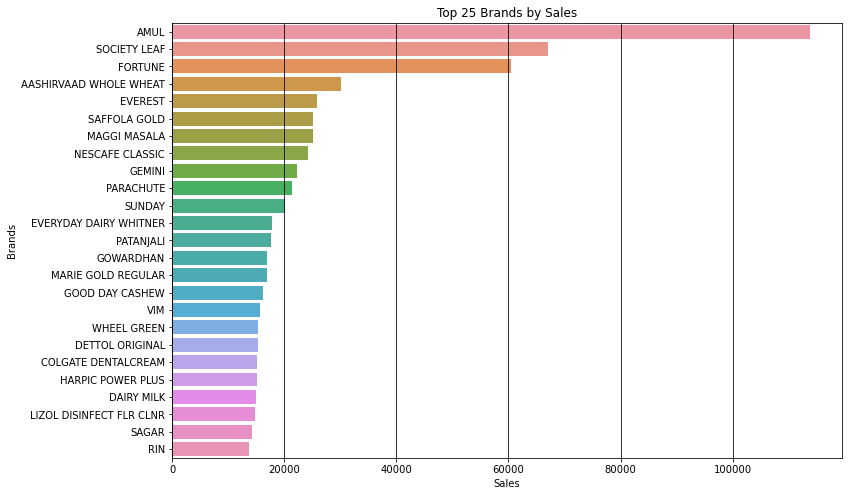

In [16]:
brands_v = merged_df.groupby('BRD').sum().sort_values('VALUE',ascending=False)[['VALUE','QTY_x']][0:25]
plt.figure(figsize=(12,8))
sns.barplot(x='VALUE',y=brands_v.index,data=brands_v)
plt.title("Top 25 Brands by Sales")
plt.xlabel("Sales")
plt.ylabel("Brands")
plt.grid(axis='x',color='black')

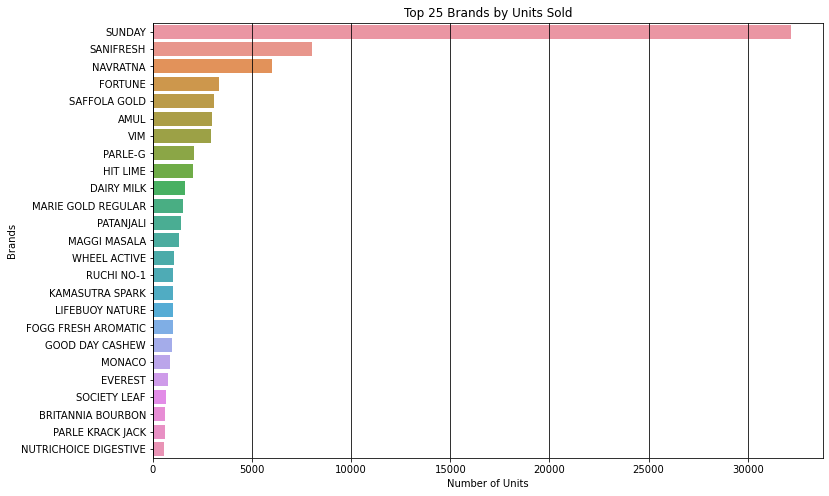

In [17]:
brands_q = merged_df.groupby('BRD').sum().sort_values('QTY_x',ascending=False)[['VALUE','QTY_x']][0:25]
plt.figure(figsize=(12,8))
sns.barplot(x='QTY_x',y=brands_q.index,data=brands_q)
plt.title("Top 25 Brands by Units Sold")
plt.xlabel("Number of Units")
plt.ylabel("Brands")
plt.grid(axis='x',color='black')

## Brand analysis by store

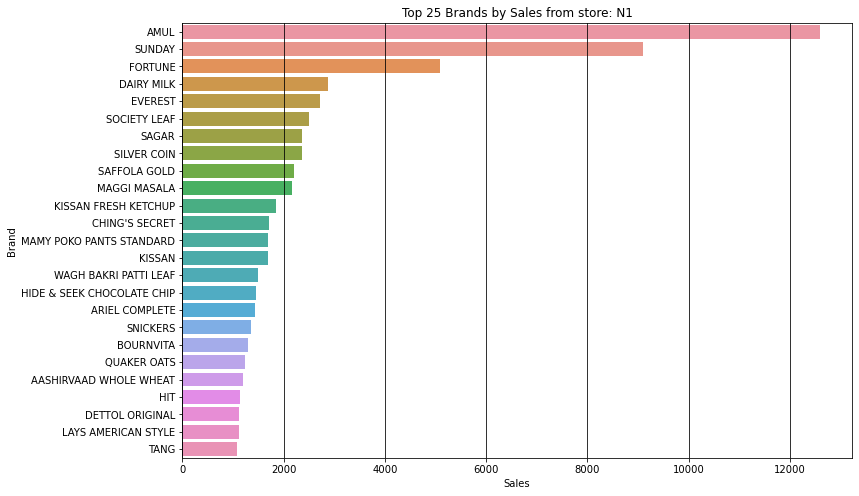

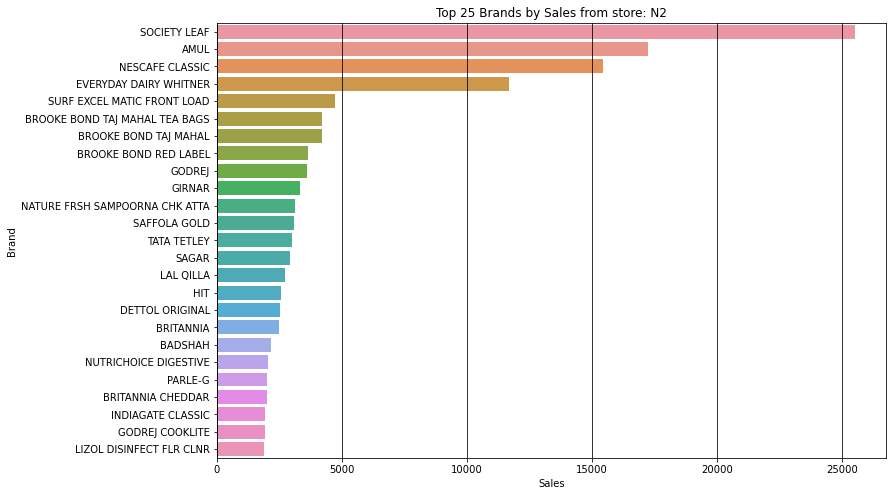

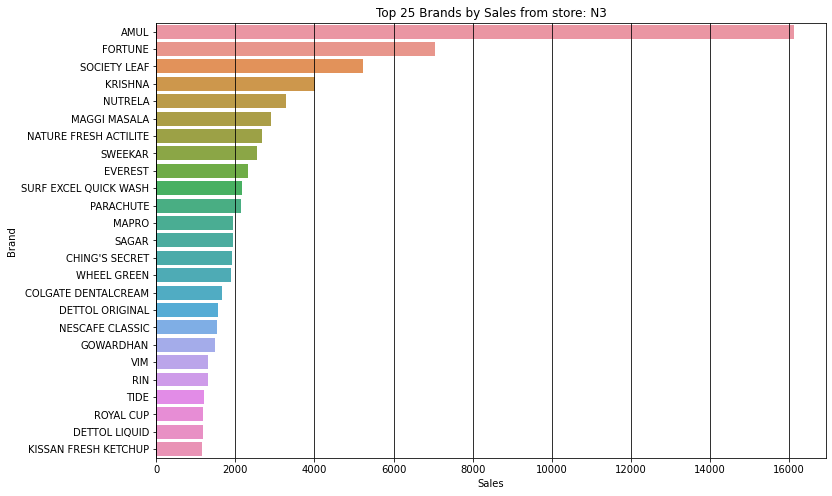

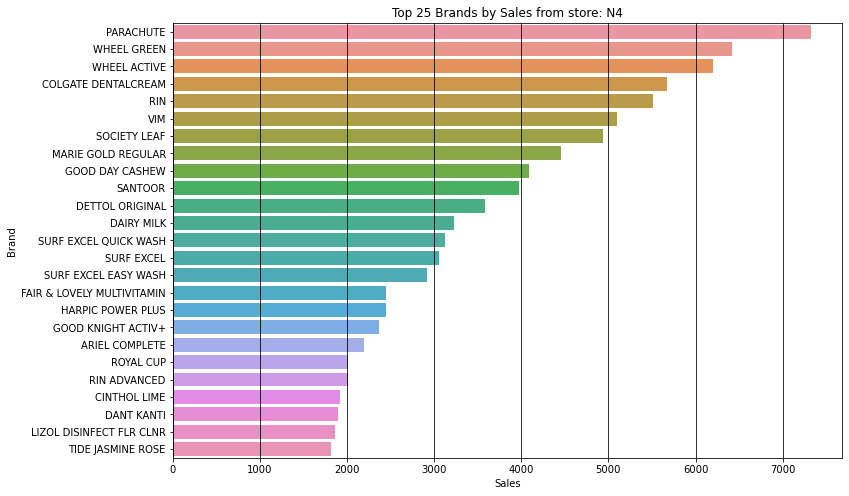

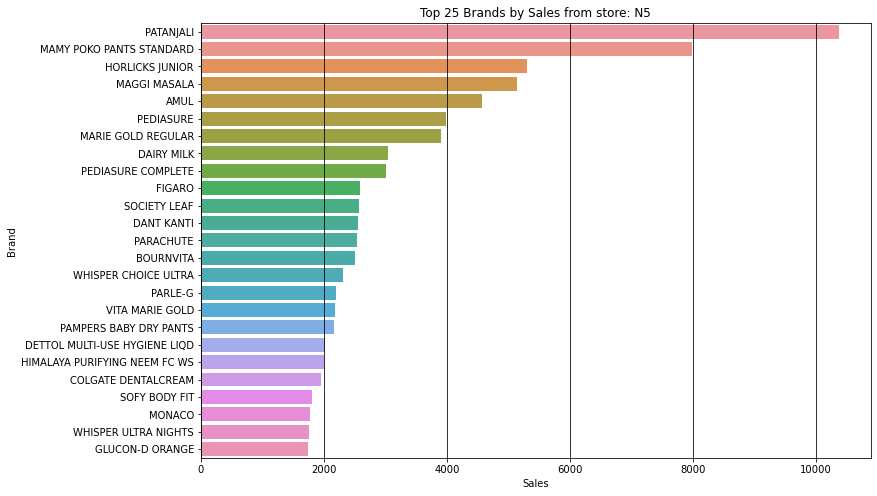

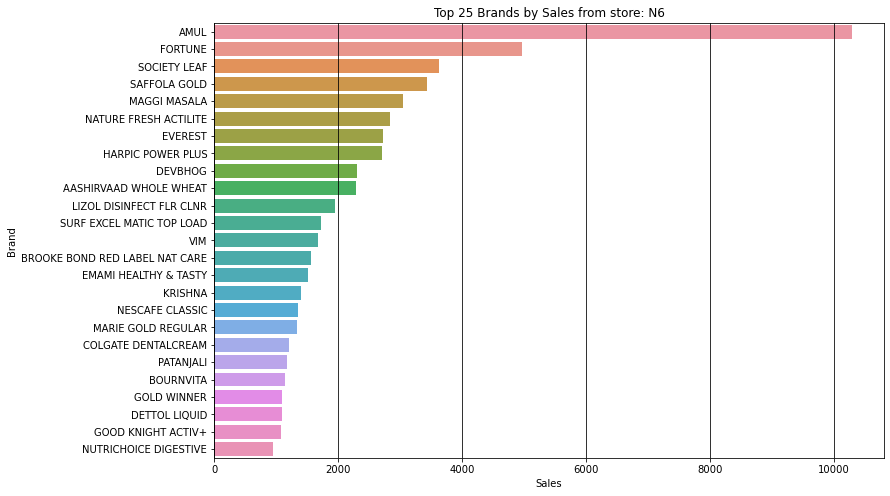

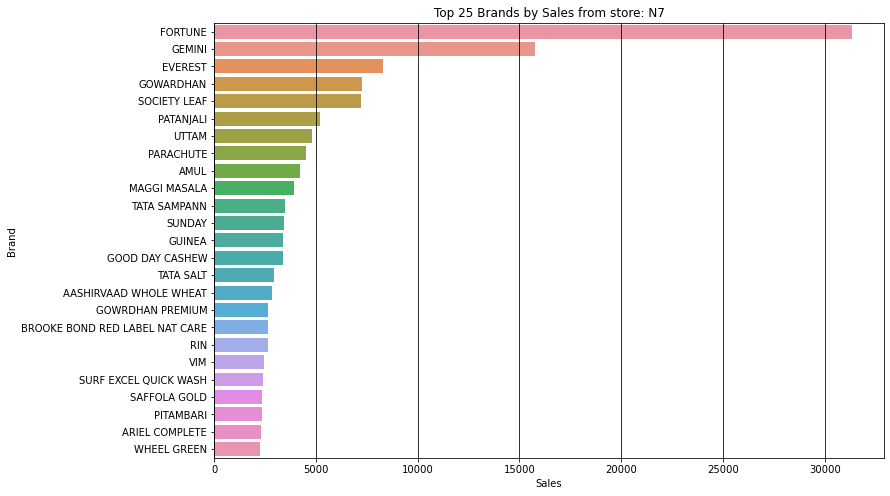

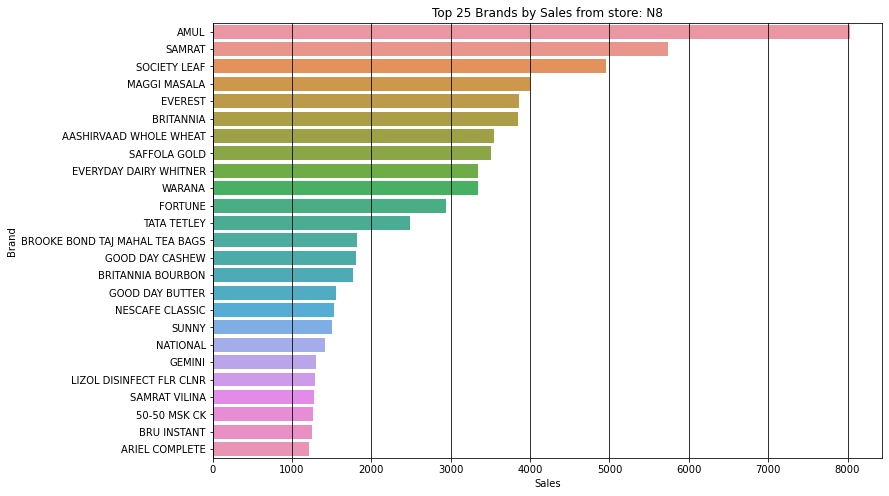

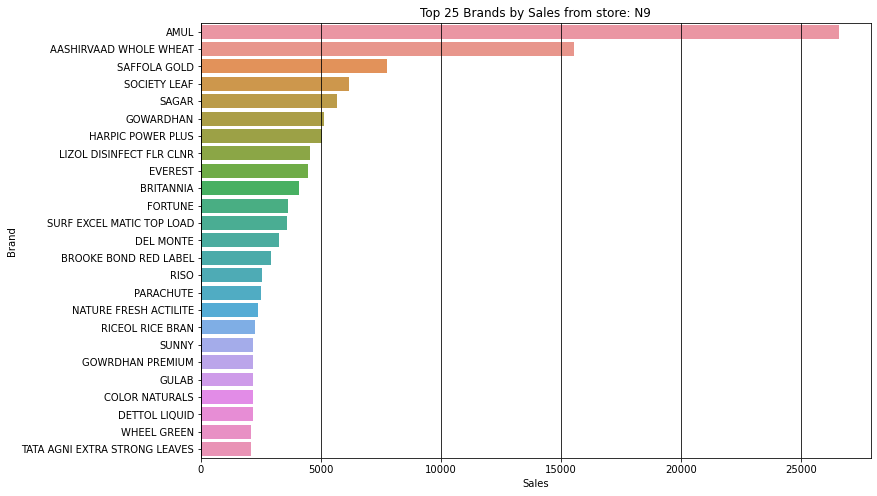

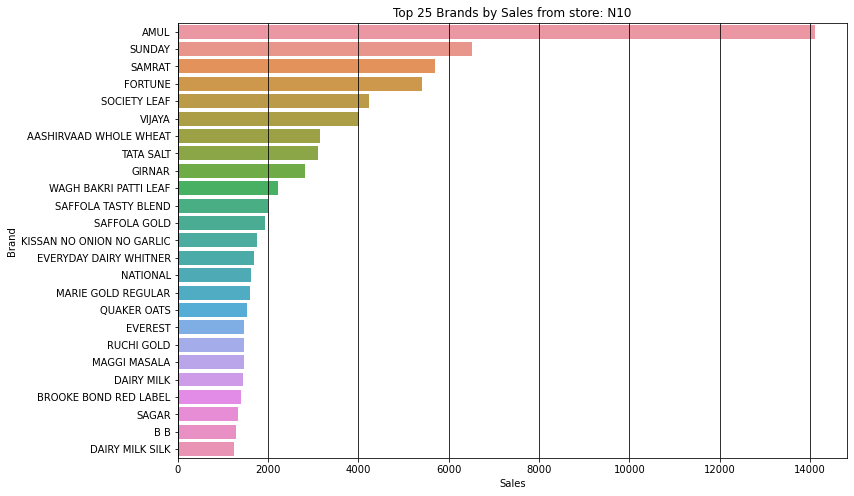

In [18]:
for i in merged_df.STORECODE.unique():
    brd_st = merged_df.loc[merged_df.STORECODE == i]
    brd = brd_st.groupby('BRD').sum().sort_values('VALUE',ascending=False)[['VALUE','QTY_x']][0:25]
    plt.figure(figsize=(12,8))
    sns.barplot(x='VALUE',y=brd.index,data=brd)
    plt.title("Top 25 Brands by Sales from store: " + i)
    plt.xlabel("Sales")
    plt.ylabel("Brand")
    plt.grid(axis='x',color='black')

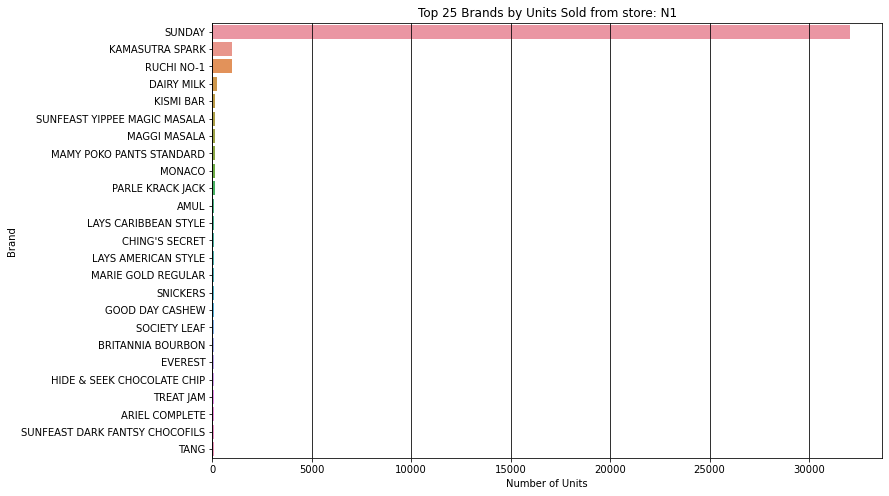

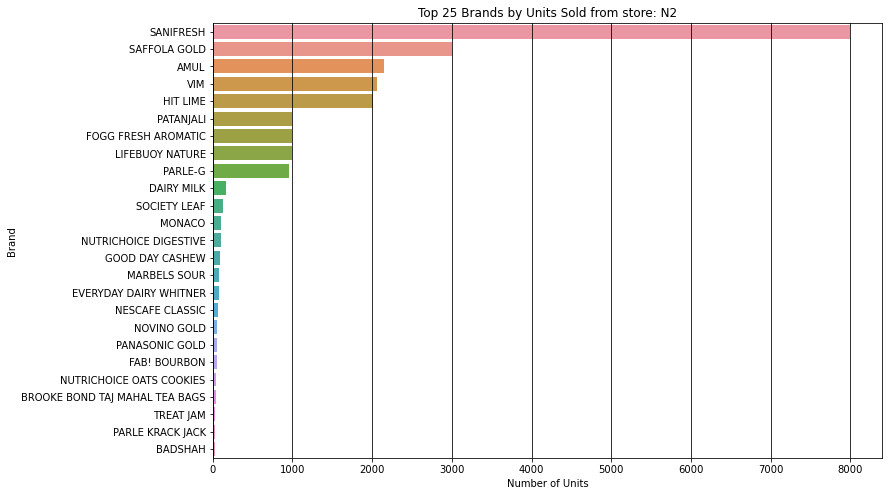

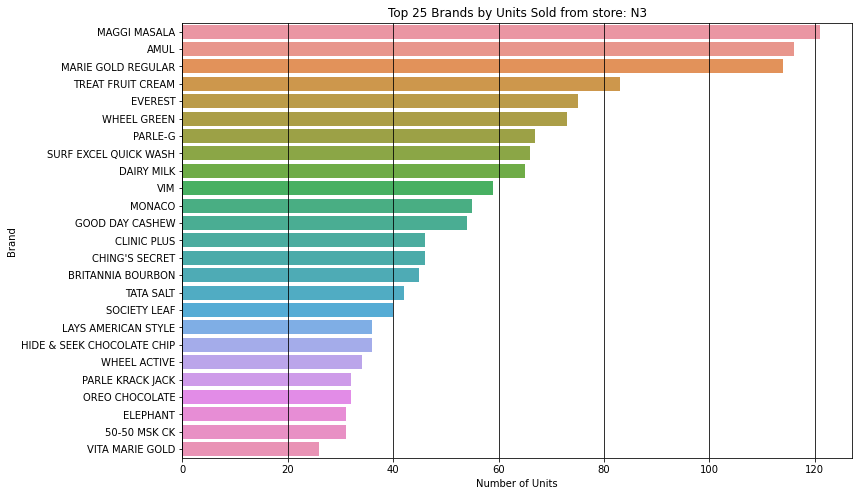

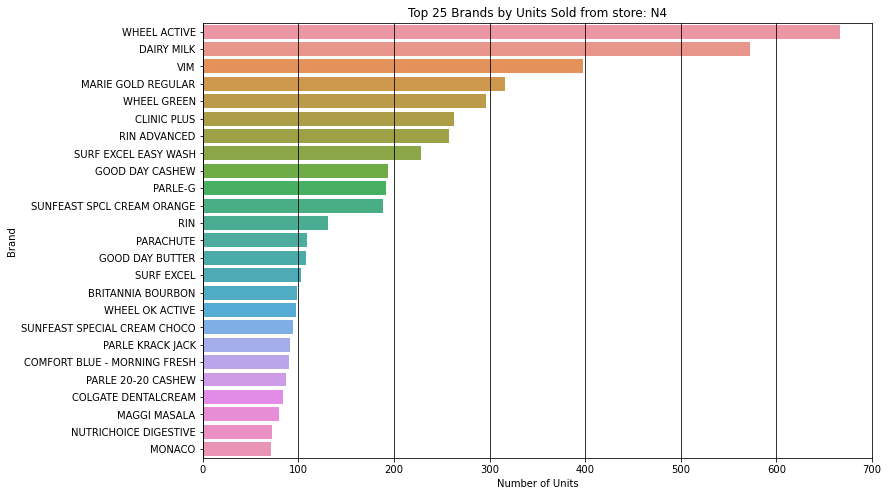

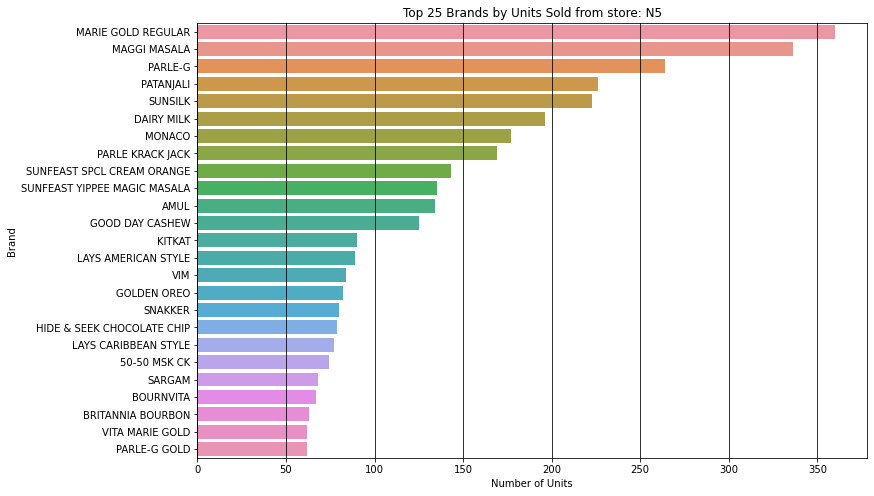

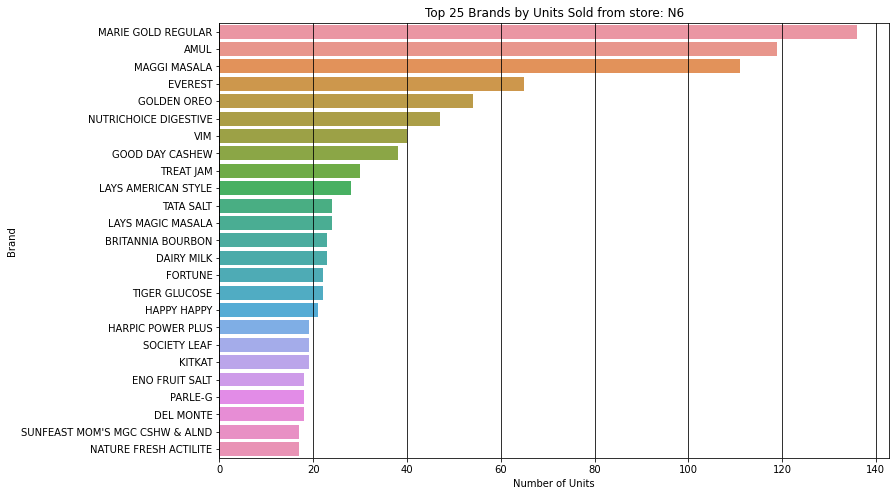

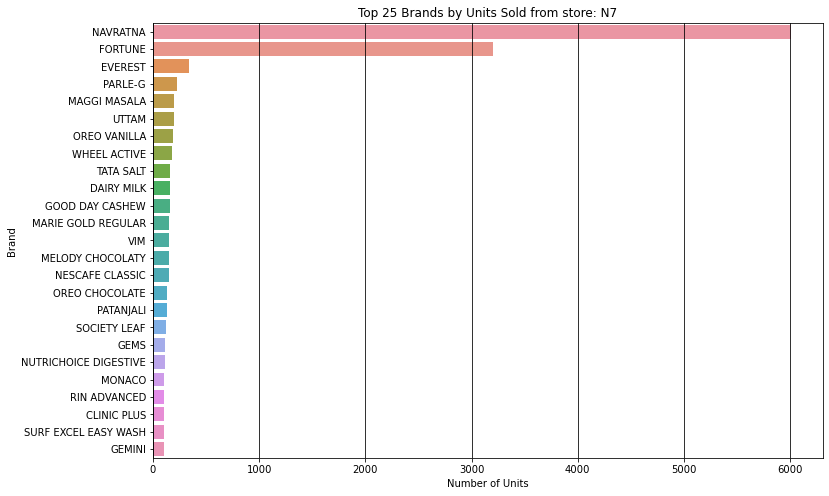

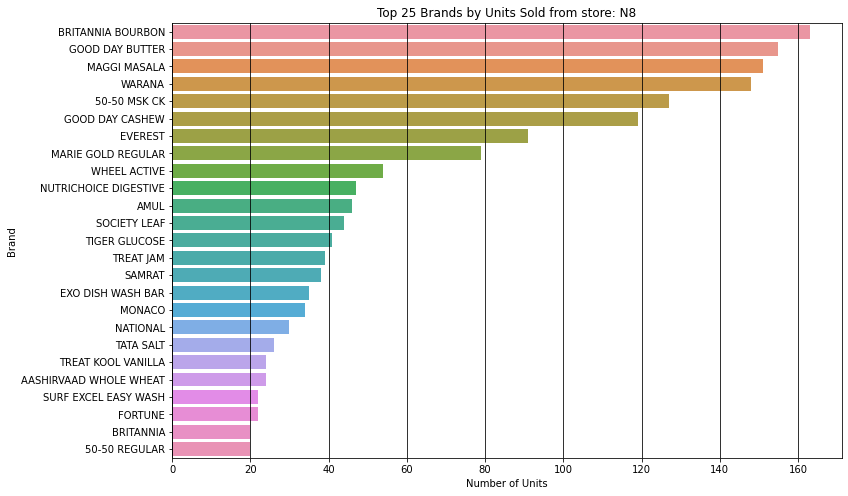

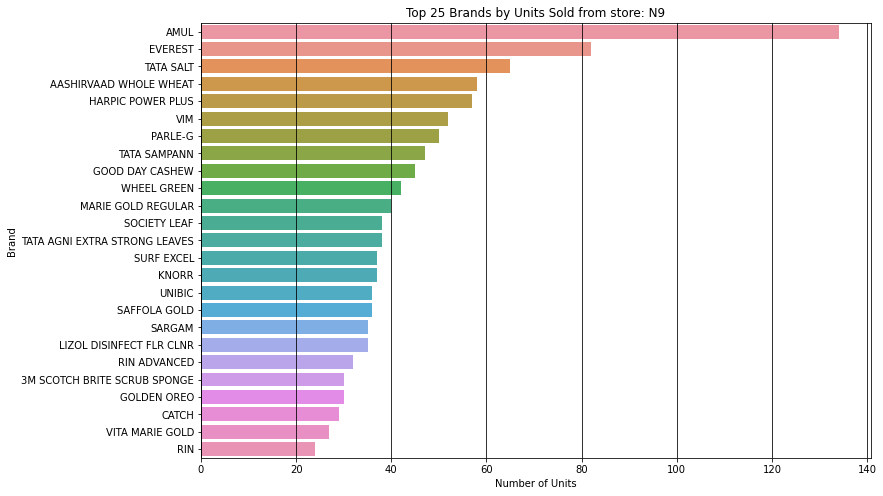

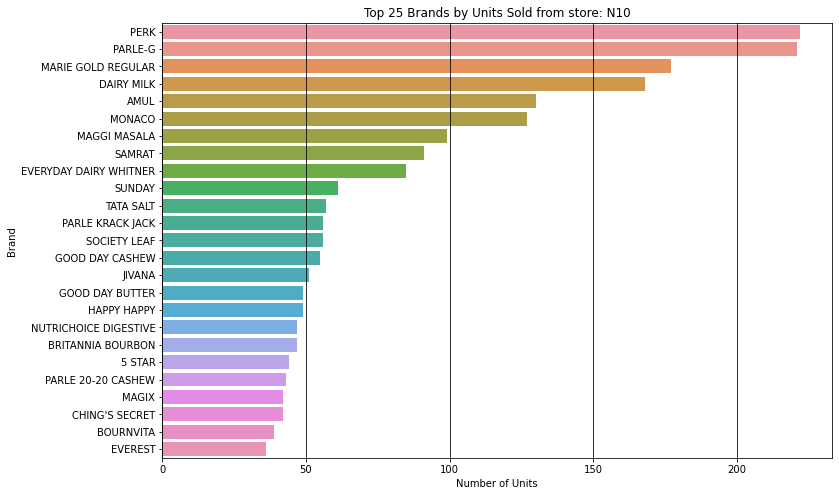

In [19]:
for i in merged_df.STORECODE.unique():
    brd_st = merged_df.loc[merged_df.STORECODE == i]
    brd = brd_st.groupby('BRD').sum().sort_values('QTY_x',ascending=False)[['VALUE','QTY_x']][0:25]
    plt.figure(figsize=(12,8))
    sns.barplot(x='QTY_x',y=brd.index,data=brd)
    plt.title("Top 25 Brands by Units Sold from store: " + i)
    plt.xlabel("Number of Units")
    plt.ylabel("Brand")
    plt.grid(axis='x',color='black')

## Product Analysis

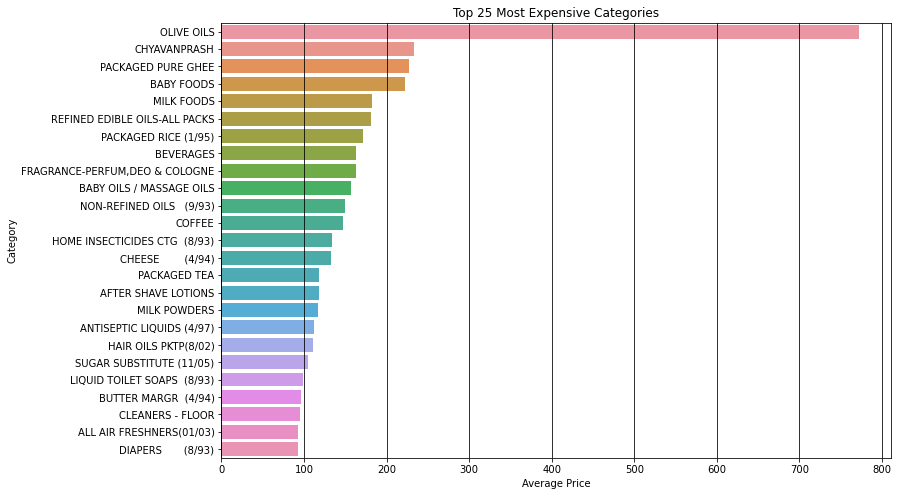

In [20]:
grp_per_price = merged_df.groupby("GRP").mean().sort_values("PRICE", ascending=False)[["PRICE","QTY_x"]][0:25]
plt.figure(figsize=(12,8))
sns.barplot(x='PRICE',y=grp_per_price.index,data=grp_per_price)
plt.title("Top 25 Most Expensive Categories")
plt.ylabel("Category")
plt.xlabel("Average Price")
plt.grid(axis='x',color='black')

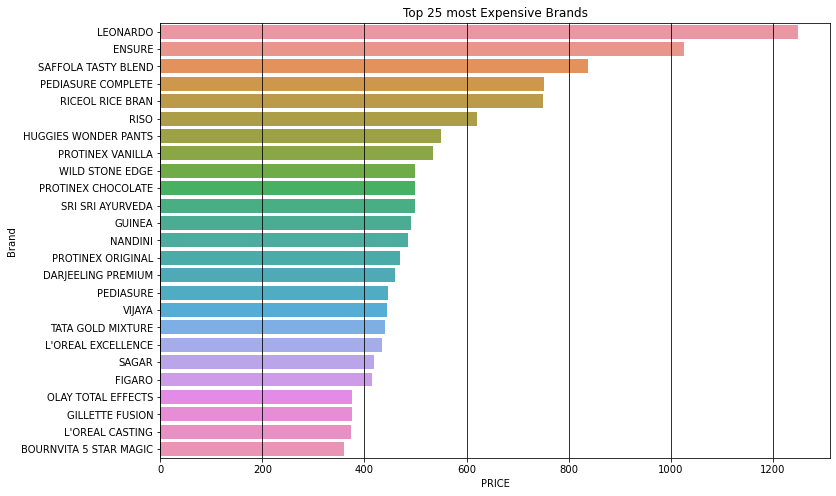

In [21]:
top_exp_brd = merged_df.groupby('BRD').mean().sort_values('PRICE',ascending=False)[['PRICE','QTY_x']][0:25]
plt.figure(figsize=(12,8))
sns.barplot(x='PRICE',y=top_exp_brd.index,data=top_exp_brd)
plt.title("Top 25 most Expensive Brands")
plt.ylabel("Brand")
plt.grid(axis='x',color='black');

Text(0, 0.5, 'Sales (in $)')

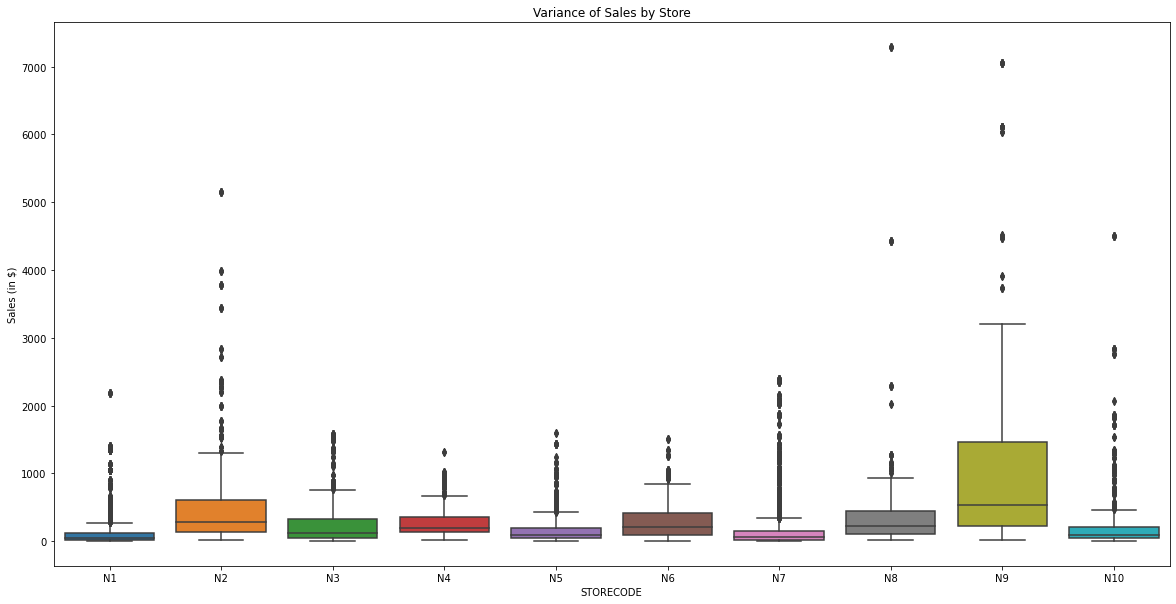

In [22]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df["STORECODE"],y=df["BILL_AMT"],data=df)
plt.title("Variance of Sales by Store")
plt.ylabel("Sales (in $)")

## Which Store Sells More Units?

In [23]:
store_qty = merged_df.groupby("UNIQUE_ID").sum()[['QTY_x','PRICE']]
store_qty

,QTY_x,PRICE
UNIQUE_ID,,
N10_T1038,1.0,34.0
N10_T1039,1.0,46.0
N10_T1040,1.0,86.0
N10_T1043,1.0,20.0
N10_T1048,2.0,180.0
...,...,...
N9_T940,1.0,200.0
N9_T95,1.0,56.0
N9_T953,28.0,885.0


In [24]:
store_qty['STORE'] = store_qty.index.str.split('_').str[0]
store_qty

,QTY_x,PRICE,STORE
UNIQUE_ID,,,
N10_T1038,1.0,34.0,N10
N10_T1039,1.0,46.0,N10
N10_T1040,1.0,86.0,N10
N10_T1043,1.0,20.0,N10
N10_T1048,2.0,180.0,N10
...,...,...,...
N9_T940,1.0,200.0,N9
N9_T95,1.0,56.0,N9
N9_T953,28.0,885.0,N9


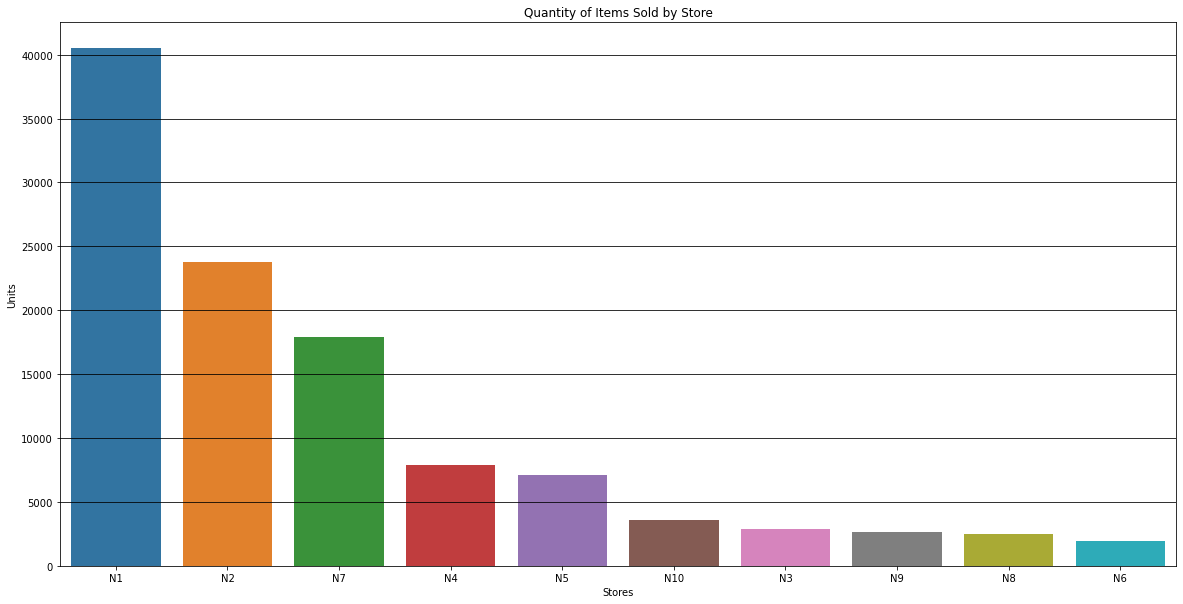

In [25]:
units_by_store = store_qty.groupby("STORE").sum().sort_values('QTY_x',ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(x=units_by_store.index,y=units_by_store["QTY_x"],data=units_by_store)
plt.title("Quantity of Items Sold by Store")
plt.xlabel("Stores")
plt.ylabel("Units")
plt.grid(axis='y',color='black');

In [26]:
str_brd = df.groupby("STORECODE")["BRD"].nunique().sort_values(ascending=False)
str_brd

STORECODE
N5     572
N7     496
N1     447
N4     357
N9     347
N3     326
N2     313
N6     284
N10    272
N8     261
Name: BRD, dtype: int64

# Sales by Month

In [27]:
month_info = merged_df[["MONTH","UNIQUE_ID"]]
month_info

,MONTH,UNIQUE_ID
0,M1,N1_T375
1,M1,N1_T379
2,M1,N1_T381
3,M1,N1_T382
4,M1,N1_T384
...,...,...
26980,M3,N10_T5999
26981,M3,N10_T6007
26982,M3,N10_T6007
26983,M3,N10_T6007


In [28]:
monthly_sales = pd.merge(month_info,unique_sales,on="UNIQUE_ID")
monthly_sales

,MONTH,UNIQUE_ID,DAY_y,BILL_AMT_y,STORE
0,M1,N1_T375,4,225.0,N1
1,M1,N1_T379,4,95.0,N1
2,M1,N1_T381,4,10.0,N1
3,M1,N1_T382,4,108.0,N1
4,M1,N1_T384,4,19.0,N1
...,...,...,...,...,...
26980,M3,N10_T5999,31,10.0,N10
26981,M3,N10_T6007,31,88.0,N10
26982,M3,N10_T6007,31,88.0,N10
26983,M3,N10_T6007,31,88.0,N10


In [29]:
monthly_sales['N_MONTH'] = monthly_sales['MONTH'].apply(lambda x: x[1])
monthly_sales

,MONTH,UNIQUE_ID,DAY_y,BILL_AMT_y,STORE,N_MONTH
0,M1,N1_T375,4,225.0,N1,1
1,M1,N1_T379,4,95.0,N1,1
2,M1,N1_T381,4,10.0,N1,1
3,M1,N1_T382,4,108.0,N1,1
4,M1,N1_T384,4,19.0,N1,1
...,...,...,...,...,...,...
26980,M3,N10_T5999,31,10.0,N10,3
26981,M3,N10_T6007,31,88.0,N10,3
26982,M3,N10_T6007,31,88.0,N10,3
26983,M3,N10_T6007,31,88.0,N10,3


In [30]:
monthly_sales = monthly_sales.drop('MONTH',axis=1)
monthly_sales

,UNIQUE_ID,DAY_y,BILL_AMT_y,STORE,N_MONTH
0,N1_T375,4,225.0,N1,1
1,N1_T379,4,95.0,N1,1
2,N1_T381,4,10.0,N1,1
3,N1_T382,4,108.0,N1,1
4,N1_T384,4,19.0,N1,1
...,...,...,...,...,...
26980,N10_T5999,31,10.0,N10,3
26981,N10_T6007,31,88.0,N10,3
26982,N10_T6007,31,88.0,N10,3
26983,N10_T6007,31,88.0,N10,3


In [31]:
monthly_sales['N_MONTH'] = pd.to_numeric(monthly_sales['N_MONTH'])

In [32]:
month_uq = monthly_sales.groupby('UNIQUE_ID').mean()
month_uq

,DAY_y,BILL_AMT_y,N_MONTH
UNIQUE_ID,,,
N10_T1038,5,34.0,1
N10_T1039,5,46.0,1
N10_T1040,5,86.0,1
N10_T1043,5,20.0,1
N10_T1048,5,180.0,1
...,...,...,...
N9_T940,2,200.0,3
N9_T95,7,56.0,1
N9_T953,3,1656.0,3


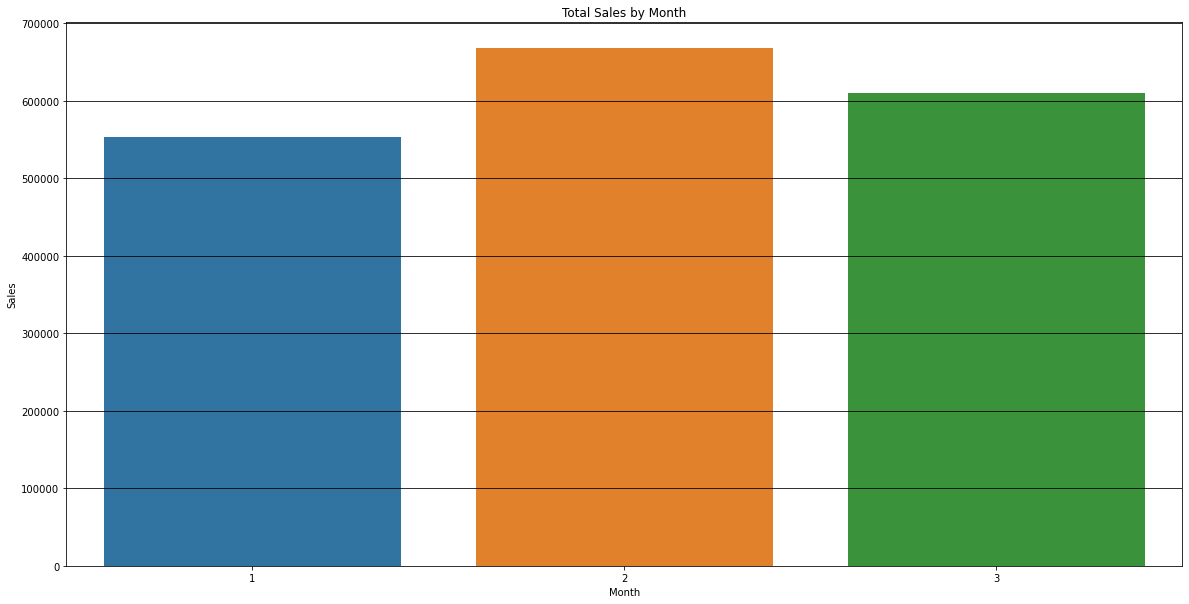

In [33]:
m_sales = month_uq.groupby('N_MONTH').sum()
plt.figure(figsize=(20,10))
sns.barplot(x=m_sales.index,y='BILL_AMT_y',data=m_sales)
plt.title("Total Sales by Month")
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(axis='y',color='black');